# Laboratorio 4(Aplicacion de Regularizacion - Regresion Lineal) Grupo 1
 <h3>En este laboratorio se hizo el uso del dataset para aplicar la regularización y sin utilizar regularización a la Regresion Lineal, y como siguiente se presento los resultados de ambas experiencias<h3>
 <HR>
 <h3>
  NOMBRE: POLO ORELLANA BRAYAN SIMON <br>
  CARRERA: INGENIERIA DE SISTEMAS <BR>
  FECHA: 26/03/2024 <BR>

  * [Enlace de invitacion para ser colaborador](https://github.com/bspoloo/SIS420-012024/invitations)
  
  * [Enlace al git hub](https://github.com/bspoloo/SIS420-012024/tree/main/Laboratorios/Lab%201)
  
  * [Enlace al Colab](https://colab.research.google.com/github/bspoloo/SIS420-012024/blob/main/Laboratorios/Laboratorio%204/Regresion%20lineal.ipynb?hl=es#scrollTo=jmDd6cd2hQ_W)
  
 <h3>

 Para el laboratorio implementando regularizacion se hizo uso del dataset para predecir el precio de las casas en USA. El enlace al dataset es [House Sales in King County, USA](https://www.kaggle.com/datasets/harlfoxem/housesalesprediction).

El conjunto de datos, denominado ``kc_house_data.csv``, contiene un conjunto de entrenamiento de precios de casas en el condado de King. Este conjunto de datos probablemente incluye varias características relevantes para predecir el precio de las casas, como el tamaño de la vivienda, el número de habitaciones, la ubicación, las características específicas de la casa, etc.


Primero se importo todas las librerias necesarias:

In [46]:
# utilizando la libreria os para manejos de directorios
import os

# Computacion vectorial y cientifica para python
import numpy as np

#importamos pandas para el manejo del dataset, y separarlos dentro de una matriz
import pandas as pd

#esta tabulate nos sirve para hacer tablas
from tabulate import tabulate

# Librerias para graficación (trazado de gráficos)
from matplotlib import pyplot
from mpl_toolkits.mplot3d import Axes3D  # -> Necesario para graficar superficies 3D

#Para separa el 20% y 80%
from sklearn.model_selection import train_test_split

# llama a matplotlib a embeber graficas dentro de los cuadernillos
%matplotlib inline

## Carga de datos del dataset

cargamos los datos haciendo el uso de la libreria **Pandas** que  es una herramienta poderosa y versátil utilizada para manipulación y análisis de datos. Ofrece estructuras de datos flexibles y eficientes para trabajar con datos tabulares, como hojas de cálculo en Excel o tablas SQL. Algunas de las funcionalidades clave de pandas incluyen:

In [47]:
#cargamos el dataset a un dataframe
df = pd.read_csv('kc_house_data.csv', delimiter=',')

#mostramos el dataset
df

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21608,263000018,20140521T000000,360000.0,3,2.50,1530,1131,3.0,0,0,...,8,1530,0,2009,0,98103,47.6993,-122.346,1530,1509
21609,6600060120,20150223T000000,400000.0,4,2.50,2310,5813,2.0,0,0,...,8,2310,0,2014,0,98146,47.5107,-122.362,1830,7200
21610,1523300141,20140623T000000,402101.0,2,0.75,1020,1350,2.0,0,0,...,7,1020,0,2009,0,98144,47.5944,-122.299,1020,2007
21611,291310100,20150116T000000,400000.0,3,2.50,1600,2388,2.0,0,0,...,8,1600,0,2004,0,98027,47.5345,-122.069,1410,1287


## Analisis del dataset
Hacemos un analisis del dataset mostrando su informacion usando la funcion de `info()`:

In [48]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21613 non-null  int64  
 1   date           21613 non-null  object 
 2   price          21613 non-null  float64
 3   bedrooms       21613 non-null  int64  
 4   bathrooms      21613 non-null  float64
 5   sqft_living    21613 non-null  int64  
 6   sqft_lot       21613 non-null  int64  
 7   floors         21613 non-null  float64
 8   waterfront     21613 non-null  int64  
 9   view           21613 non-null  int64  
 10  condition      21613 non-null  int64  
 11  grade          21613 non-null  int64  
 12  sqft_above     21613 non-null  int64  
 13  sqft_basement  21613 non-null  int64  
 14  yr_built       21613 non-null  int64  
 15  yr_renovated   21613 non-null  int64  
 16  zipcode        21613 non-null  int64  
 17  lat            21613 non-null  float64
 18  long  

In [49]:
dataset = df.drop(['id', 'date'], axis=1).astype(float)
dataset

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,221900.0,3.0,1.00,1180.0,5650.0,1.0,0.0,0.0,3.0,7.0,1180.0,0.0,1955.0,0.0,98178.0,47.5112,-122.257,1340.0,5650.0
1,538000.0,3.0,2.25,2570.0,7242.0,2.0,0.0,0.0,3.0,7.0,2170.0,400.0,1951.0,1991.0,98125.0,47.7210,-122.319,1690.0,7639.0
2,180000.0,2.0,1.00,770.0,10000.0,1.0,0.0,0.0,3.0,6.0,770.0,0.0,1933.0,0.0,98028.0,47.7379,-122.233,2720.0,8062.0
3,604000.0,4.0,3.00,1960.0,5000.0,1.0,0.0,0.0,5.0,7.0,1050.0,910.0,1965.0,0.0,98136.0,47.5208,-122.393,1360.0,5000.0
4,510000.0,3.0,2.00,1680.0,8080.0,1.0,0.0,0.0,3.0,8.0,1680.0,0.0,1987.0,0.0,98074.0,47.6168,-122.045,1800.0,7503.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21608,360000.0,3.0,2.50,1530.0,1131.0,3.0,0.0,0.0,3.0,8.0,1530.0,0.0,2009.0,0.0,98103.0,47.6993,-122.346,1530.0,1509.0
21609,400000.0,4.0,2.50,2310.0,5813.0,2.0,0.0,0.0,3.0,8.0,2310.0,0.0,2014.0,0.0,98146.0,47.5107,-122.362,1830.0,7200.0
21610,402101.0,2.0,0.75,1020.0,1350.0,2.0,0.0,0.0,3.0,7.0,1020.0,0.0,2009.0,0.0,98144.0,47.5944,-122.299,1020.0,2007.0
21611,400000.0,3.0,2.50,1600.0,2388.0,2.0,0.0,0.0,3.0,8.0,1600.0,0.0,2004.0,0.0,98027.0,47.5345,-122.069,1410.0,1287.0


Se puede notar que nuestro dataset cuenta con 21 columnas, donde nuestra colummna `price` sera nuestra Y_predicha, el cual se busca calcular el precio de una casa dada 20 caracteristicas.

## Separacion del 80% de los datos para entrenamiento y 20% para pruebas

Haremos uso de la libreria `sklearn` haciendo uso de su funcion `train_test_split()`, donde recibe como parametros:

`Arrays o matrices de características (X): `Estos son los datos que se utilizarán para hacer predicciones. Por lo general, son las variables independientes o características del conjunto de datos.

`test_size (opcional):` Este parámetro especifica el tamaño del conjunto de prueba. Puede ser un número decimal entre 0 y 1, que representa el porcentaje del conjunto de datos que se asignará al conjunto de prueba, o puede ser un entero que representa el número absoluto de muestras en el conjunto de prueba. Por ejemplo, si test_size=0.2, se asignará el 20% del conjunto de datos al conjunto de prueba.

`train_size (opcional):` Este parámetro especifica el tamaño del conjunto de entrenamiento. Al igual que test_size, puede ser un número decimal entre 0 y 1 o un entero que representa el número absoluto de muestras en el conjunto de entrenamiento. Si no se proporciona, se calcula automáticamente como 1 - test_size.

`random_state (opcional):` Este parámetro permite establecer una semilla para la generación de números pseudoaleatorios. Esto garantiza que la división de los datos sea reproducible. Si se establece en un número entero, el resultado será el mismo cada vez que se ejecute el código.

In [50]:
#retiramos el id y la fecha del las columnas, quitamos el precio ya que ira a el vector Y, tambien quitamos los titulos, covierto a float
dataset = df.drop(['id', 'date'], axis=1).astype(float)

#separamos el 20% para test y el 80% para entrenamiento deld dataset
train_dataset, test_dataset = train_test_split(dataset, test_size=0.2, random_state=42)

# Seleccionamos las columnas para X y la columna 'price' para y
X_test = test_dataset.drop(['price'], axis=1).values
y_test = test_dataset['price'].values
m_test = len(y_test)

# Seleccionamos las columnas para X y la columna 'price' para y
X_train = train_dataset.drop(['price'], axis=1).values
y_train = train_dataset['price'].values
m_train = len(y_test)
# Ahora, X y y deberían contener datos numéricos del 80% del dataset

# imprimir todos las X de datos solo 10
print('{:>8s}{:>8s}{:>10s}{:>10s}{:>8s}{:>8s}{:>8s}{:>8s}{:>6s}{:>10s}{:>10s}{:>10s}{:>10s}{:>10s}{:>10s}{:>10s}{:>10s}{:>10s}{:>10s}'.format(
    'X[:,0]', 'X[:, 1]', 'X[:, 2]', 'X[:, 3]', 'X[:, 4]', 'X[:, 5]', 'X[:, 6]', 'X[:, 7]', 'X[:, 8]', 'X[:, 9]', 'X[:, 10]', 'X[:, 11]',
    'X[:, 12]', 'X[:, 13]', 'X[:, 14]', 'X[:, 15]', 'X[:, 16]', 'X[:, 17]', 'Y'
))
print('-' * 180)

for i in range(10):
    print('{:8.0f}{:8.0f}{:10.0f}{:10.0f}{:8.0f}{:8.0f}{:8.0f}{:8.0f}{:8.0f}{:10.0f}{:8.0f}{:10.0f}{:10.0f}{:10.0f}{:10.2f}{:10.2f}{:10.0f}{:11.0f}{:14.0f}'.format(
        X_train[i, 0], 
        X_train[i, 1], 
        X_train[i, 2], 
        X_train[i, 3], 
        X_train[i, 4], 
        X_train[i, 5], 
        X_train[i, 6], 
        X_train[i, 7], 
        X_train[i, 8], 
        X_train[i, 9], 
        X_train[i, 10], 
        X_train[i, 11],
        X_train[i, 12],
        X_train[i, 13], 
        X_train[i, 14], 
        X_train[i, 15], 
        X_train[i, 16], 
        X_train[i, 17], 
        y_train[i]
    ))


  X[:,0] X[:, 1]   X[:, 2]   X[:, 3] X[:, 4] X[:, 5] X[:, 6] X[:, 7]X[:, 8]   X[:, 9]  X[:, 10]  X[:, 11]  X[:, 12]  X[:, 13]  X[:, 14]  X[:, 15]  X[:, 16]  X[:, 17]         Y
------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
       3       2      1780     13095       1       0       0       4       9      1780       0      1983         0     98042     47.37   -122.15      2750      13095        325000
       2       1      1000      3700       1       0       0       3       6       800     200      1929         0     98118     47.55   -122.29      1270       5000        257000
       3       1      1080      7486       2       0       0       3       6       990      90      1942         0     98146     47.48   -122.33      1170       7800        228500
       3       2      2090      7500       1       0       0       4       7      1280     810      197

In [51]:
#mostramos la cantidad de ejemplos
print(" ")
print('El 80% de ejemplos para entrenamiento son la cantidad de: {:.0f} de ejemplos'.format( len(train_dataset)))
print('El 20% de ejemplos para pruebas son la cantidad de: {:.0f} de ejemplos'.format( len(test_dataset)))
print('La cantidad total de ejemplos es de: {:.0f} de ejemplos'.format( len(dataset)))

 
El 80% de ejemplos para entrenamiento son la cantidad de: 17290 de ejemplos
El 20% de ejemplos para pruebas son la cantidad de: 4323 de ejemplos
La cantidad total de ejemplos es de: 21613 de ejemplos


## Funcion para la Normalización de caracteristicas

Al visualizar los datos se puede observar que las caracteristicas tienen diferentes magnitudes, por lo cual se debe transformar cada valor en una escala de valores similares, esto con el fin de que el descenso por el gradiente pueda converger mas rapidamente. En este caso

Hacemos el uso de la siguiente funcion para normalizar los datos:

In [52]:
def  featureNormalize(X):
    X_norm = X.copy()

    #creamos un array de ceros con una longitud igual al número de columnas en el array X. La variable mu y sigma se inicializa como este array de ceros.
    mu = np.zeros(X.shape[1])
    sigma = np.zeros(X.shape[1])

    #Creamos el promedio de cada filaa de X
    #media de cada columna
    mu = np.mean(X, axis = 0)
    
    #desviacion estandar de cada fila de X
    sigma = np.std(X, axis = 0)
    
    sigma[sigma == 0] = 1
    
    #normalizamos los datos con la siguiente formula
    X_norm = (X - mu) / sigma

    return X_norm, mu, sigma

## Funcion para graficar

In [53]:
# Creamos una funcion que nos ayude con las graficas de cada dato respecto a la Y predicha
def graficarDatos(x, y, xlabel, ylabel):
    fig = pyplot.figure()
    pyplot.plot(x, y, 'ro', ms=10, mec='k')

    pyplot.xlabel(xlabel)
    pyplot.ylabel(ylabel)

## Creacion de la funcion del error cuadratico medio

In [54]:
#Creamos la funcion:
def mean_squared_error(y_pred, y_actual):
    resta = y_pred - y_actual
    err_cuadrado = np.sum(resta ** 2)
    return err_cuadrado / len(y_pred)

## Funcion de calculo de costo con regularizacion

In [55]:
#aumentamos el parametro de lambda para aplicar regularizacion
#Creamos la funcion de calcular costo
def calcularCostoCR(X, y, theta, lambda_):
    m = y.size
    J = 0
    
    #creamos una varable temporal para theta, donde decimos que el primer valor de temp es 0, esto para respetar la formula donde j = 1
    temp = theta.copy()
    temp[0] = 0  # Excluimos theta_0 de la regularización
    h = np.dot(X, theta)
    J = (1 / (2 * m)) * np.sum(np.square(h - y)) + (lambda_ / (2 * m)) * np.sum(np.square(temp))
    return J

### Funcion de descenso por el gradiente con regularizacion

In [56]:
#Creamos la funcion para calcular el descenso por Gradiente
def calcularDescensoGradienteCR(X, y, theta, alpha,lambda_, numero_iteraciones):
    m = y.shape[0]
    theta = theta.copy()
    J_historico = []

    for i in range(numero_iteraciones):
        
        theta[0] = theta[0] - ((alpha/m) *( np.dot(X, theta) - y).dot(X[:, 0]))
        theta[1:] = theta[1:]*(1-((alpha*lambda_)/m)) - (alpha / m) * (np.dot(X, theta) - y).dot(X[:, 1:])

        # theta = theta*(1-((alpha*lambda_)/m)) - (alpha / m) * (np.dot(X, theta) - y).dot(X)
        
        # se hace uso de la funcion de costo para calcular el costo en cada iteracion, sin olvidar del parametro lambda_
        J_historico.append(calcularCostoCR(X, y, theta, lambda_))

    return theta, J_historico

## Funcion de calculo de costo sin regularizacion

In [57]:
def calcularCostoSR(X, y, theta):
    m = y.size
    J = 0
    #h = np.dot(X, theta)
    # print(h)
    J = (1/(2 * m)) * np.sum(np.square(np.dot(X, theta) - y))
    return J

### Funcion de descenso por el gradiente sin regularizacion

In [58]:
#Creamos la funcion para calcular el descenso por Gradiente
def calcularDescensoGradienteSR(X, y, theta, alpha, numero_iteraciones):
    m = y.shape[0]
    theta = theta.copy()
    J_historico = []

    for i in range(numero_iteraciones):
        
        theta = theta - (alpha / m) * (np.dot(X, theta) - y).dot(X)
        # se hace uso de la funcion de costo para calcular el costo en cada iteracion
        J_historico.append(calcularCostoSR(X, y, theta))

    return theta, J_historico

## Funcion del calculo de la ecuacion de la normal con regularizacion

In [59]:
def calcularThethaEcuacionNormalCR(X, y, lambda_):
    m,n = X.shape
    
    # Creamos la matriz L
    L = np.eye(n)  # Matriz identidad de tamaño (n+1) x (n+1)
    L[0, 0] = 0  # Establecemos el primer elemento de la matriz L en 0
    
    theta = np.zeros(X.shape[1])

    theta = np.dot(np.dot(np.linalg.inv(np.dot(np.transpose(X),X) + (lambda_*L)), np.transpose(X)),y)

    return theta

## Funcion del calculo de la ecuacion de la normal sin regularizacion

In [60]:
def calcularThethaEcuacionNormalSR(X, y):
    theta = np.zeros(X.shape[1])

    theta = np.dot(np.dot(np.linalg.inv(np.dot(np.transpose(X),X)),np.transpose(X)),y)

    return theta

## 1. Usando Regularizacion

La regularización es una técnica utilizada en el aprendizaje automático para prevenir el **sobreajuste (overfitting)** de un modelo a los datos de entrenamiento.

El sobreajuste ocurre cuando un modelo se ajusta demasiado bien a los datos de entrenamiento y captura el ruido o las fluctuaciones aleatorias en los datos en lugar de aprender la verdadera relación subyacente entre las características y la variable objetivo. Esto puede resultar en un rendimiento deficiente del modelo cuando se enfrenta a nuevos datos que no formaban parte del conjunto de entrenamiento.

### 1.1 regresion lineal multivariable

Carga de los datos para la regresion lineal multivariable:

In [61]:
#hacemos una copia de y_train y y_test para usarlo en la regresion lineal multivariable

#estos datos seran usados para el entrenamiento
X_testRLM = X_test.copy()
y_testRLM = y_test.copy()
m_test_RLM = len(y_testRLM)

#estos datos seran usados para el test
X_trainRLM = X_train.copy()
y_trainRLM = y_train.copy()
m_train_RLM = len(y_trainRLM)

#### 1.1.1 Normalizacion de las caracteristicas

Se hace uso de la funcion de `featureNormalize(X) ` donde se recibe un parametro de tipo matriz para normalizar cada dato dentro de ella, retornandome la **matriz normalizda**, **sigma(desviacion estandar)**, y mi **mu(media)**.

In [62]:
#introductimos los datos a la funcion de normalizacion
X_norm_RLM, mu_RLM, sigma_RLM = featureNormalize(X_trainRLM)

# imprimimos algunos valores de X_norm
print('{:>10s}{:>10s}{:>10s}{:>10s}{:>10s}{:>10s}{:>10s}{:>10s}{:>10s}{:>10s}{:>10s}{:>10s}{:>10s}{:>10s}{:>10s}{:>10s}{:>10s}{:>10s}'.format(
    'X[:,0]', 'X[:, 1]', 'X[:, 2]', 'X[:, 3]', 'X[:, 4]', 'X[:, 5]', 'X[:, 6]', 'X[:, 7]', 'X[:, 8]', 'X[:, 9]', 'X[:, 10]', 'X[:, 11]',
    'X[:, 12]', 'X[:, 13]', 'X[:, 14]', 'X[:, 15]', 'X[:, 16]', 'X[:, 17]'
))
print('-' * 180)

for i in range(10):
    print('{:10.3f}{:10.3f}{:10.3f}{:10.3f}{:10.3f}{:10.3f}{:10.3f}{:10.3f}{:10.3f}{:10.3f}{:10.3f}{:10.3f}{:10.3f}{:10.3f}{:10.3f}{:10.3f}{:10.3f}{:10.3f}'.format(
        X_norm_RLM[i, 0], 
        X_norm_RLM[i, 1], 
        X_norm_RLM[i, 2], 
        X_norm_RLM[i, 3], 
        X_norm_RLM[i, 4], 
        X_norm_RLM[i, 5], 
        X_norm_RLM[i, 6], 
        X_norm_RLM[i, 7], 
        X_norm_RLM[i, 8], 
        X_norm_RLM[i, 9], 
        X_norm_RLM[i, 10], 
        X_norm_RLM[i, 11],
        X_norm_RLM[i, 12],
        X_norm_RLM[i, 13], 
        X_norm_RLM[i, 14], 
        X_norm_RLM[i, 15], 
        X_norm_RLM[i, 16], 
        X_norm_RLM[i, 17],))



    X[:,0]   X[:, 1]   X[:, 2]   X[:, 3]   X[:, 4]   X[:, 5]   X[:, 6]   X[:, 7]   X[:, 8]   X[:, 9]  X[:, 10]  X[:, 11]  X[:, 12]  X[:, 13]  X[:, 14]  X[:, 15]  X[:, 16]  X[:, 17]
------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
    -0.395    -0.474    -0.324    -0.044    -0.920    -0.085    -0.306     0.909     1.150    -0.007    -0.656     0.404    -0.208    -0.675    -1.397     0.442     1.126     0.013
    -1.469    -1.453    -1.184    -0.286    -0.920    -0.085    -0.306    -0.625    -1.413    -1.200    -0.200    -1.431    -0.208     0.751    -0.060    -0.540    -1.047    -0.281
    -0.395    -1.453    -1.095    -0.188     0.002    -0.085    -0.306    -0.625    -1.413    -0.969    -0.451    -0.989    -0.208     1.276    -0.553    -0.860    -1.193    -0.179
    -0.395     0.178     0.018    -0.188    -0.920    -0.085    -0.306     0.909    -0.559    -

#### 1.1.2 Agregamos la columna de unos a nuestra matriz

In [63]:
X_ready_RLM = np.concatenate([np.ones((m_train_RLM, 1)), X_norm_RLM], axis=1)

# imprimimos algunos valores de X_norm
print('{:>10s}{:>10s}{:>10s}{:>10s}{:>10s}{:>10s}{:>10s}{:>10s}{:>10s}{:>10s}{:>10s}{:>10s}{:>10s}{:>10s}{:>10s}{:>10s}{:>10s}{:>10s}{:>10s}'.format(
    'X[:,0]', 'X[:, 1]', 'X[:, 2]', 'X[:, 3]', 'X[:, 4]', 'X[:, 5]', 'X[:, 6]', 'X[:, 7]', 'X[:, 8]', 'X[:, 9]', 'X[:, 10]', 'X[:, 11]',
    'X[:, 12]', 'X[:, 13]', 'X[:, 14]', 'X[:, 15]', 'X[:, 16]', 'X[:, 17]', 'X[:, 18]'
))
print('-' * 180)

for i in range(10):
    print('{:10.3f}{:10.3f}{:10.3f}{:10.3f}{:10.3f}{:10.3f}{:10.3f}{:10.3f}{:10.3f}{:10.3f}{:10.3f}{:10.3f}{:10.3f}{:10.3f}{:10.3f}{:10.3f}{:10.3f}{:10.3f}{:10.3f}'.format(
        X_ready_RLM[i, 0], 
        X_ready_RLM[i, 1], 
        X_ready_RLM[i, 2], 
        X_ready_RLM[i, 3], 
        X_ready_RLM[i, 4], 
        X_ready_RLM[i, 5], 
        X_ready_RLM[i, 6], 
        X_ready_RLM[i, 7], 
        X_ready_RLM[i, 8], 
        X_ready_RLM[i, 9], 
        X_ready_RLM[i, 10], 
        X_ready_RLM[i, 11],
        X_ready_RLM[i, 12],
        X_ready_RLM[i, 13], 
        X_ready_RLM[i, 14], 
        X_ready_RLM[i, 15], 
        X_ready_RLM[i, 16], 
        X_ready_RLM[i, 17],
        X_ready_RLM[i, 18]))

    X[:,0]   X[:, 1]   X[:, 2]   X[:, 3]   X[:, 4]   X[:, 5]   X[:, 6]   X[:, 7]   X[:, 8]   X[:, 9]  X[:, 10]  X[:, 11]  X[:, 12]  X[:, 13]  X[:, 14]  X[:, 15]  X[:, 16]  X[:, 17]  X[:, 18]
------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
     1.000    -0.395    -0.474    -0.324    -0.044    -0.920    -0.085    -0.306     0.909     1.150    -0.007    -0.656     0.404    -0.208    -0.675    -1.397     0.442     1.126     0.013
     1.000    -1.469    -1.453    -1.184    -0.286    -0.920    -0.085    -0.306    -0.625    -1.413    -1.200    -0.200    -1.431    -0.208     0.751    -0.060    -0.540    -1.047    -0.281
     1.000    -0.395    -1.453    -1.095    -0.188     0.002    -0.085    -0.306    -0.625    -1.413    -0.969    -0.451    -0.989    -0.208     1.276    -0.553    -0.860    -1.193    -0.179
     1.000    -0.395     0.178     0.018    -0.188    -

#### 1.1.3 Descenso por el gradiente

El descenso por el gradiente con la función de costo es un algoritmo fundamental en el aprendizaje automático supervisado, especialmente en problemas de optimización de modelos. Su propósito principal es minimizar la función de costo (o pérdida) de un modelo mediante ajustes iterativos de los parámetros del modelo.

##### 1.1.3.1 Cálculo del costo $J(\theta)$

hacemos uso de la funcion `def calcularCosto(X, y, theta, lambda_)`;

Ejemplo de funcionamiento de la funcion computeCoste con dos valores diferentes de $\theta$.

In [64]:
theta_RLM=np.array([0.2, 3.0, 0.2,0.1, 3.0, 0.2,1.1, 2.0, 0.7,0.8, 5.8, 0.9,0.7, 2.0, 0.5,0.8, 1.0, 0.2,0.3])
theta_RLM1=np.array([0.1, 2.0, 0.5,0.2, 8.0, 0.7,1.3, 8.0, 1.7,0.7, 7.1, 0.6,0.6, 1.0, 0.3,0.9, 2.0, 0.12,0.7])

lambda_ = 1000
print(theta_RLM.shape[0])
print(f"########################################################################################################")
print(f"con theta:{ theta_RLM } se obtiene un costo de: {calcularCostoCR(X_ready_RLM, y_trainRLM, theta_RLM, lambda_)}")
print(f"########################################################################################################")
print(f"con theta:{ theta_RLM1 } se obtiene un costo de: {calcularCostoCR(X_ready_RLM, y_trainRLM, theta_RLM1, lambda_)}")

19
########################################################################################################
con theta:[0.2 3.  0.2 0.1 3.  0.2 1.1 2.  0.7 0.8 5.8 0.9 0.7 2.  0.5 0.8 1.  0.2
 0.3] se obtiene un costo de: 209918722471.0707
########################################################################################################
con theta:[0.1  2.   0.5  0.2  8.   0.7  1.3  8.   1.7  0.7  7.1  0.6  0.6  1.
 0.3  0.9  2.   0.12 0.7 ] se obtiene un costo de: 209917518348.3954


##### 1.1.3.2Descenso por el gradiente

Hacemos uso de la funcion para hacer el calculo del descenso por el gradiente y asi encontrar nuestras **Thetas**, se hizo la modificacion para que la funcion ahora reciba el parametro de ``lamda_``

Se inicializan los parametros $\theta$ con 0 y la taza de aprendizaje $\alpha$ con 0.00009.

In [111]:
#creamos un theta con 19 columnas de ceros
theta = np.zeros(len(X_ready_RLM[0]))

#numero de iteraciones sera 1000000 y un alpha 0.00009
num_ite_RLM = 15000
alpha_RLM = 0.0009
lambda_RLM = 1000

theta_RLM, J_historico_RLM = calcularDescensoGradienteCR(X_ready_RLM, y_trainRLM, theta , alpha_RLM,lambda_RLM, num_ite_RLM)
print("########################################################################################################")
print("Los valores de theta calculados son:")
i = 0
for tht_RLM in theta_RLM:
    i += 1
    print(f"theta {i}: {tht_RLM}")

print(f"########################################################################################################")
#mostramos el ultimo costo, este seria el mejor costo
print(f"con un costo de: { J_historico_RLM[-1]} ")

print("la cantidad de theta son: ", theta_RLM.shape[0])

########################################################################################################
Los valores de theta calculados son:
theta 1: 537767.3151570671
theta 2: -26006.483323707715
theta 3: 32435.214060366427
theta 4: 75892.95542475116
theta 5: 3549.622897456415
theta 6: 5399.731103951505
theta 7: 45605.33855185711
theta 8: 40771.94489080824
theta 9: 17340.438943302812
theta 10: 99816.75322960115
theta 11: 69688.86479463907
theta 12: 26438.57702070923
theta 13: -68489.00224620069
theta 14: 10429.30557586353
theta 15: -23728.174747204775
theta 16: 79127.30848129092
theta 17: -26437.998206975255
theta 18: 24080.050090089757
theta 19: -7711.6762394290645
########################################################################################################
con un costo de: 20901521586.956726 
la cantidad de theta son:  19


#### 1.1.4 Grafica de la convergencia del costo
graficamos el costo

Text(0, 0.5, 'Costo J')

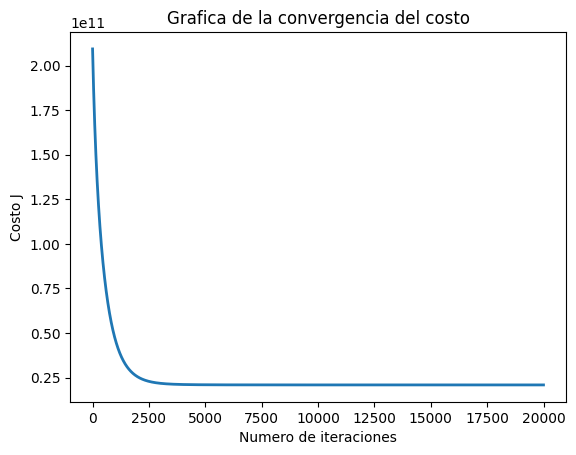

In [66]:
pyplot.plot(np.arange(len(J_historico_RLM)), J_historico_RLM, lw=2)
pyplot.title("Grafica de la convergencia del costo")
pyplot.xlabel('Numero de iteraciones')
pyplot.ylabel('Costo J')

##### 1.1.4.1 Grafica de la regresion lineal

En esta parte se trazan los datos de entrenamiento y una línea que representa la regresión lineal ajustada a esos datos.

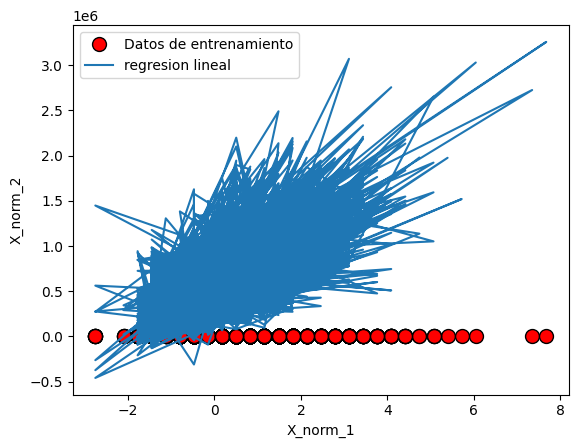

In [67]:
graficarDatos(X_norm_RLM[:, 1],  X_norm_RLM[:, 2] , "X_norm_1", "X_norm_2")

pyplot.plot(X_norm_RLM[:,1], np.dot(X_ready_RLM, theta_RLM), '-')

pyplot.legend(['Datos de entrenamiento', 'regresion lineal'])

haciendo una pequeña prueba:

In [68]:
X_arrayRLM = np.array([1,3,1,1180,5650,1,0,0,3,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650])
X_arrayRLM = X_arrayRLM.reshape(1, -1)

X_arrayRLM[:, 1:] = (X_arrayRLM[:, 1:] - mu_RLM) / sigma_RLM

prediccion_RLM = np.dot(X_arrayRLM, theta_RLM)

print (f"La prediccion de la casa es de: {prediccion_RLM}")

La prediccion de la casa es de: [218875.95888595]


#### 1.1.5 Ejemplos de Predicciones

Se creo una matriz con 11 ejemplos, donde se hace las predicciones correspondientes:

In [69]:
#Creamos la matriz con 11 ejemplos para hacer la prueba predecir un precio de cada ejemplo:
matriz_datos_RLM = np.array([
    [1,3,1,1180,5650,1,0,0,3,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650],
    [1,2,0.75,1020,1076,2,0,0,3,7,1020,0,2008,0,98144,47.5941,-122.299,1020,1357],
    [1,4,2.75,3555,6565,2,0,0,3,9,3555,0,2014,0,98053,47.6847,-122.017,3625,5637],
    [1,2,1,1040,13920,1,0,0,3,6,1040,0,1973,1867,98198,47.3756,-122.306,1100,7575],
    [1,4,1.75,1860,7350,1,0,0,4,7,1090,770,1977,1900,98031,47.3979,-122.174,1710,7350],
    [1,1,1,1060,54846,1,1,4,3,5,1060,0,1935,0,98070,47.4716,-122.445,2258,31762],
    [1,4,1.5,2220,9496,1,0,0,4,7,1490,730,1954,0,98004,47.6233,-122.206,1800,8286],
    [1,4,1.5,1560,6534,1,0,0,4,7,1560,0,1962,0,98007,47.6012,-122.152,1560,6969],
    [1,5,3,2510,4125,1.5,0,3,5,8,1590,920,1925,0,98144,47.5968,-122.29,2190,5415],
    [1,3,2.5,1680,2096,2,0,0,3,8,1380,300,2008,0,98117,47.6904,-122.37,1360,2096],
    [1,3,2.25,2020,3600,2,0,0,3,8,2020,0,1998,0,98033,47.6678,-122.165,2070,3699]
])

#creamos un vector parta almacenar cada Y predicha
y_pre_RLM = []
matriz_datos_RLM_copy = matriz_datos_RLM.copy()

#Normalizamos todos, menos el primer valor de cada ejemplo

matriz_datos_RLM_copy[:, 1:] = (matriz_datos_RLM_copy[:, 1:] - mu_RLM) / sigma_RLM


#Calculamos la Y predicha de los 11 ejemplos de prediccion
for datos in matriz_datos_RLM_copy:
    y_pre_RLM.append(np.dot(datos, theta_RLM))

matriz_datos_RLM = np.column_stack((matriz_datos_RLM, y_pre_RLM))

nombres_columnas = ['bedrooms','bathrooms','sqft_living','sqft_lot','floors','waterfront','view','condition','grade','sqft_above','sqft_basement','yr_built','yr_renovated','zipcode','lat','long','sqft_living15','sqft_lot15','Price']

# Convertir la matriz en una lista de listas
datos_para_tabla = matriz_datos_RLM.tolist()

print(len(matriz_datos_RLM[0]))
print(len(matriz_datos_RLM_copy[0]))

# Imprimir la tabla
print(tabulate(datos_para_tabla, headers=nombres_columnas, tablefmt='grid'))

20
19
+----+------------+-------------+---------------+------------+----------+--------------+--------+-------------+---------+--------------+-----------------+------------+----------------+-----------+---------+----------+-----------------+--------------+----------+
|    |   bedrooms |   bathrooms |   sqft_living |   sqft_lot |   floors |   waterfront |   view |   condition |   grade |   sqft_above |   sqft_basement |   yr_built |   yr_renovated |   zipcode |     lat |     long |   sqft_living15 |   sqft_lot15 |    Price |
+====+============+=============+===============+============+==========+==============+========+=============+=========+==============+=================+============+================+===========+=========+==========+=================+==============+==========+
|  1 |          3 |        1    |          1180 |       5650 |      1   |            0 |      0 |           3 |       7 |         1180 |               0 |       1955 |              0 |     98178 | 47.5112 | -

#### 1.1.6 Validaciones
Para hacer las validaciones correspondientes, primero se crea la funcion del **Mean squeared error**

Siguiendo el consejo de 80/20, donde 80% es para la fase de entrenamiento, y 20% es para la fase de prueba.

haciendo calculo del error cuadratico medio:

In [70]:
#Concatenamos de unos a la primera posicion del X_test
X_testRLM_ready = np.concatenate([np.ones((m_test_RLM, 1)), X_testRLM], axis=1)

# Normalizamos todos, menos el primer valor de cada ejemplo porque este contiene los unos
X_testRLM_ready[:, 1:] = (X_testRLM_ready[:, 1:] - mu_RLM) / sigma_RLM

#creamos un array que almacenara cada una de las y_predicha
y_predicha_RLM = []
for data_RLM in X_testRLM_ready:
    y_predicha_RLM.append(np.dot(data_RLM, theta_RLM))

mse_RLM = mean_squared_error(y_predicha_RLM, y_testRLM)
#calculamos el error cuadratico medio:
print('Error Cuadrático Medio (MSE) = ' + str(mse_RLM))
print('Raíz del Error Cuadrático Medio (RMSE) = ' + str(np.sqrt(mse_RLM)))

Error Cuadrático Medio (MSE) = 45584372752.44013
Raíz del Error Cuadrático Medio (RMSE) = 213504.97125931314


### 1.2 Regresion Polinomica

Importamos **PolynomialFeatures** es una clase en scikit-learn que se utiliza para generar características polinómicas a partir de un conjunto de características existente. En el contexto de regresión polinómica, puedes usar PolynomialFeatures para generar nuevas características que son combinaciones polinómicas de las características originales.

In [71]:
from sklearn.preprocessing import PolynomialFeatures

Carga de los datos para la regresion lineal multivariable:

In [72]:
#hacemos una copia de y_train y y_test para usarlo en la regresion lineal multivariable

#estos datos seran usados para el entrenamiento
X_testRLP = X_test.copy()
y_testRLP = y_test.copy()
m_test_RLP = len(y_testRLM)
#estos datos seran usados para el test

#hacemos uso de la libreria PolynomialFeatures para hacer la regresion polinomial de grado 2
poly = PolynomialFeatures(degree=2)
#hacemos una copia de y_train y y_test para usarlo en la regresion polinomial
X_trainRLP = poly.fit_transform(X_train.copy())
y_trainRLP = y_train.copy()
m_train_RLP = len(y_trainRLM)

print("la cantidad de columnas de X_trainRLP es de: ", X_trainRLP.shape[1])
print("la cantidad de ejemplos de X_trainRLP es de: ", X_trainRLP.shape[0])

la cantidad de columnas de X_trainRLP es de:  190
la cantidad de ejemplos de X_trainRLP es de:  17290


#### 1.2.1 Normalizacion de las caracteristicas

Se hace uso de la funcion de `featureNormalize(X) ` para normalizar cada una de las 190 feactures de mi nueva matriz de datos donde se recibe un parametro de tipo matriz para normalizar cada dato dentro de ella, retornandome la **matriz normalizda**, **sigma(desviacion estandar)**, y mi **mu(media)**.

In [73]:
#introductimos los datos a la funcion de normalizacion
X_norm_RLP, mu_RLP, sigma_RLP = featureNormalize(X_trainRLP)

X_norm_RLP.shape

(17290, 190)

#### 1.2.2 Agregamos la columna de unos a nuestra matriz

In [74]:
X_ready_RLP = np.concatenate([np.ones((m_train_RLP, 1)), X_norm_RLP], axis=1)
print("La cantidad de columnas de X_ready_RLP es de: ", X_ready_RLP.shape[1])

La cantidad de columnas de X_ready_RLP es de:  191


#### 1.2.3 Descenso por el gradiente

haciendo uso de la funcio de `calcularCosto(X , y, theta, lamda_)` donde `X` sera nuestra matriz normalizada, y sera nuestra `y_predicha` que en este caso sera el precio, `Thetha` que seran nuestros valores inciales, y `lamda_` que sera nuestro parametro de regularizacion.

##### 1.2.3.1 Cálculo del costo $J(\theta)$

Ejemplo de funcionamiento de la funcion computeCoste con dos valores diferentes de $\theta$.

In [75]:
#creamos un theta con 190 columnas de valores aleatorios
theta_RLP=np.random.rand(len(X_ready_RLP[1]))
theta_RLP1=np.random.rand(len(X_ready_RLP[1]))

print(len(theta_RLP))
lambda_RLP = 1000

print(f"########################################################################################################")
print(f"con theta:{ theta_RLP } se obtiene un costo de: {calcularCostoCR(X_ready_RLP, y_trainRLP, theta_RLP, lambda_RLP)}")
print(f"########################################################################################################")
print(f"con theta:{ theta_RLP1 } se obtiene un costo de: {calcularCostoCR(X_ready_RLP, y_trainRLP, theta_RLP1, lambda_RLP)}")

191
########################################################################################################
con theta:[0.05775568 0.03933114 0.90191385 0.47112046 0.5352292  0.03492634
 0.93214846 0.91341082 0.4268449  0.44680133 0.39018489 0.94554837
 0.15682191 0.55954727 0.24552774 0.80257085 0.88503954 0.5399353
 0.55685521 0.95224039 0.27356897 0.65871667 0.28944908 0.78152477
 0.98373325 0.80937855 0.44279091 0.7892571  0.94632214 0.7196434
 0.15075184 0.40420857 0.36132485 0.00273106 0.41495094 0.67211179
 0.33911486 0.03312878 0.25574473 0.36270968 0.14506142 0.3295759
 0.34490124 0.28304783 0.91502288 0.62681505 0.9861013  0.35172387
 0.56159508 0.00258611 0.30413931 0.41461689 0.20274833 0.04898539
 0.25754167 0.88135713 0.13733804 0.07731174 0.71934258 0.2113358
 0.52293202 0.20901737 0.30941829 0.77289312 0.35191815 0.89304129
 0.77299861 0.81748502 0.74188274 0.7188767  0.87992728 0.39457091
 0.4963133  0.80277215 0.07558544 0.23680871 0.69838015 0.90449363
 0.03646371 0.

##### 1.2.3.2Descenso por el gradiente

Creamos la funcion para hacer el calculo del descenso por el gradiente y asi encontrar nuestras **Thetas**, se hizo la modificacion para que la funcion ahora reciba el parametro de ``lamda_``

Haciendo uso de la funcion de `calcularDescensoGradiente(X,y, theta, alpha, lambda_,num_iteraciones)`:

In [76]:
#creamos un theta con 19 columnas de ceros
theta_RLP = np.zeros(len(X_ready_RLP[0]))

#numero de iteraciones sera 1000000 y un alpha 0.00009
num_ite_RLP = 6000
alpha_RLP = 0.0009
lambda__RLP = 1000

theta_RLP, J_historico_RLP = calcularDescensoGradienteCR(X_ready_RLP, y_trainRLP, theta_RLP , alpha_RLP,lambda_RLP, num_ite_RLP)
print("########################################################################################################")
print("Los valores de theta calculados son:")
i = 0
for tht in theta_RLP:
    i += 1
    print(f"theta {i}: {tht}")

print(f"########################################################################################################")
#mostramos el ultimo costo, este seria el mejor costo
print(f"con un costo de: { J_historico_RLP[-1]} ")

print("la cantidad de theta son: ", theta_RLP.shape[0])

########################################################################################################
Los valores de theta calculados son:
theta 1: 535345.0735608558
theta 2: 0.0
theta 3: -4869.568831818136
theta 4: -3302.437230532716
theta 5: -3995.430465837314
theta 6: 2462.99163056737
theta 7: -76.88404571706343
theta 8: -1347.5967408727324
theta 9: -2415.5025995474193
theta 10: -1045.8826942837004
theta 11: 11358.670177644122
theta 12: -2238.7532624272267
theta 13: -4070.0183507393695
theta 14: -13506.557644424669
theta 15: -3382.063558865083
theta 16: -14516.476472413804
theta 17: 22377.15371196528
theta 18: -7581.491595408281
theta 19: 153.07355692743943
theta 20: 2323.9375445170685
theta 21: 5381.324552649225
theta 22: -626.2003750296753
theta 23: 1479.368984612988
theta 24: -2965.578238021526
theta 25: -955.0894907621263
theta 26: 5247.612103114691
theta 27: -945.1350911639428
theta 28: 1515.759524329121
theta 29: 8507.281992896242
theta 30: 4629.039629835663
theta 31: -6474

#### 1.2.4 Grafica de la convergencia del costo
graficamos el costo

Text(0, 0.5, 'Costo J')

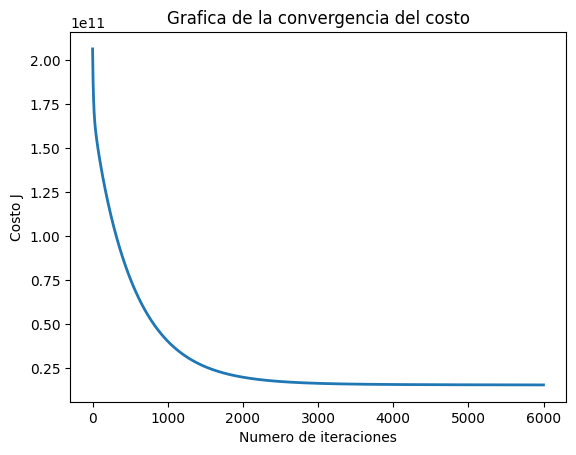

In [77]:
pyplot.plot(np.arange(len(J_historico_RLP)), J_historico_RLP, lw=2)
pyplot.title("Grafica de la convergencia del costo")
pyplot.xlabel('Numero de iteraciones')
pyplot.ylabel('Costo J')

##### 1.2.4.1 Grafica de la regresion Polinomial

En esta parte se trazan los datos de entrenamiento y una línea que representa la regresión lineal ajustada a esos datos.

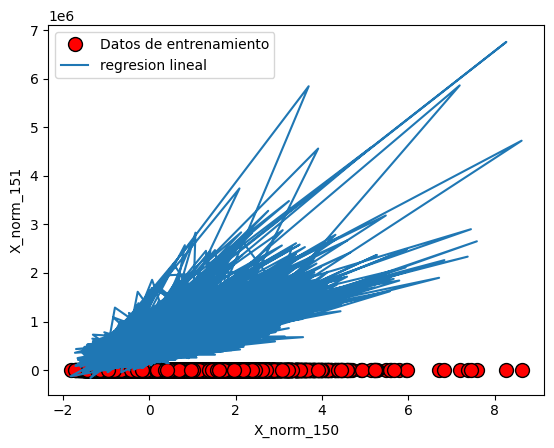

In [78]:
graficarDatos(X_norm_RLP[:, 150], X_norm_RLP[:, 151] , "X_norm_150", "X_norm_151")

pyplot.plot(X_norm_RLP[:,150], np.dot(X_ready_RLP, theta_RLP), '-')

pyplot.legend(['Datos de entrenamiento', 'regresion lineal'])

haciendo una pequeña prueba:

In [79]:
X_arrayRLP = np.array([3,1,1180,5650,1,0,0,3,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650])
X_arrayRLP = X_arrayRLP.reshape(1, -1)

poly = PolynomialFeatures(degree=2)
#hacemos una copia de y_train y y_test para usarlo en la regresion polinomial
X_arrayRLP = poly.fit_transform(X_arrayRLP)

X_arrayRLP = np.concatenate([np.ones((X_arrayRLP.shape[0], 1)), X_arrayRLP], axis=1)

X_arrayRLP[:, 1:] = (X_arrayRLP[:, 1:] - mu_RLP) / sigma_RLP

prediccion_RLP = np.dot(X_arrayRLP, theta_RLP)

print (f"La prediccion de la casa es de: {prediccion_RLP}")

La prediccion de la casa es de: [258321.78283319]


#### 1.2.5 Ejemplos de Predicciones

Se creo una matriz con 11 ejemplos, donde se hace las predicciones correspondientes:

In [80]:
#Creamos la matriz con 11 ejemplos para hacer la prueba predecir un precio de cada ejemplo:
matriz_datos_RLP = np.array([
    [3,1,1180,5650,1,0,0,3,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650],
    [2,0.75,1020,1076,2,0,0,3,7,1020,0,2008,0,98144,47.5941,-122.299,1020,1357],
    [4,2.75,3555,6565,2,0,0,3,9,3555,0,2014,0,98053,47.6847,-122.017,3625,5637],
    [2,1,1040,13920,1,0,0,3,6,1040,0,1973,1867,98198,47.3756,-122.306,1100,7575],
    [4,1.75,1860,7350,1,0,0,4,7,1090,770,1977,1900,98031,47.3979,-122.174,1710,7350],
    [1,1,1060,54846,1,1,4,3,5,1060,0,1935,0,98070,47.4716,-122.445,2258,31762],
    [4,1.5,2220,9496,1,0,0,4,7,1490,730,1954,0,98004,47.6233,-122.206,1800,8286],
    [4,1.5,1560,6534,1,0,0,4,7,1560,0,1962,0,98007,47.6012,-122.152,1560,6969],
    [5,3,2510,4125,1.5,0,3,5,8,1590,920,1925,0,98144,47.5968,-122.29,2190,5415],
    [3,2.5,1680,2096,2,0,0,3,8,1380,300,2008,0,98117,47.6904,-122.37,1360,2096],
    [3,2.25,2020,3600,2,0,0,3,8,2020,0,1998,0,98033,47.6678,-122.165,2070,3699]
])

#creamos un vector parta almacenar cada Y predicha
y_pre_RLP = []

matriz_datos_RLP_copy = matriz_datos_RLP.copy()

poly = PolynomialFeatures(degree=2)
#hacemos una copia de y_train y y_test para usarlo en la regresion polinomial
matriz_datos_RLP = poly.fit_transform(matriz_datos_RLP)

matriz_datos_RLP = np.concatenate([np.ones((matriz_datos_RLP.shape[0], 1)), matriz_datos_RLP], axis=1)


#Normalizamos todos, menos el primer valor de cada ejemplo

matriz_datos_RLP[:, 1:] = (matriz_datos_RLP[:, 1:] - mu_RLP) / sigma_RLP


#Calculamos la Y predicha de los 11 ejemplos de prediccion
for datos in matriz_datos_RLP:
    y_pre_RLP.append(np.dot(datos, theta_RLP.T))

matriz_datos_RLP_copy = np.column_stack((matriz_datos_RLP_copy, y_pre_RLP))

nombres_columnas = ['bedrooms','bathrooms','sqft_living','sqft_lot','floors','waterfront','view','condition','grade','sqft_above','sqft_basement','yr_built','yr_renovated','zipcode','lat','long','sqft_living15','sqft_lot15','Price']

# Convertir la matriz en una lista de listas
datos_para_tabla = matriz_datos_RLP_copy.tolist()

print(len(matriz_datos_RLM[0]))
print(len(matriz_datos_RLM_copy[0]))

# Imprimir la tabla
print(tabulate(datos_para_tabla, headers=nombres_columnas, tablefmt='grid'))

20
19
+------------+-------------+---------------+------------+----------+--------------+--------+-------------+---------+--------------+-----------------+------------+----------------+-----------+---------+----------+-----------------+--------------+----------+
|   bedrooms |   bathrooms |   sqft_living |   sqft_lot |   floors |   waterfront |   view |   condition |   grade |   sqft_above |   sqft_basement |   yr_built |   yr_renovated |   zipcode |     lat |     long |   sqft_living15 |   sqft_lot15 |    Price |
+============+=============+===============+============+==========+==============+========+=============+=========+==============+=================+============+================+===========+=========+==========+=================+==============+==========+
|          3 |        1    |          1180 |       5650 |      1   |            0 |      0 |           3 |       7 |         1180 |               0 |       1955 |              0 |     98178 | 47.5112 | -122.257 |           

#### 1.2.6 Validaciones
Para hacer las validaciones correspondientes, primero se crea la funcion del **Mean squeared error**

Siguiendo el consejo de 80/20, donde 80% es para la fase de entrenamiento, y 20% es para la fase de prueba.

haciendo calculo del error cuadratico medio:

In [81]:
poly = PolynomialFeatures(degree=2)
#hacemos una copia de y_train y y_test para usarlo en la regresion polinomial
X_testRLP = poly.fit_transform(X_testRLP)

# Normalizamos todos, menos el primer valor de cada ejemplo porque este contiene los unos
X_testRLP = (X_testRLP - mu_RLP) / sigma_RLP

#Concatenamos de unos a la primera posicion del X_test
X_testRLP_ready = np.concatenate([np.ones((m_test_RLP, 1)), X_testRLP], axis=1)

#creamos un array que almacenara cada una de las y_predicha
y_predicha_RLP = []
for data_RLP in X_testRLP_ready:
    y_predicha_RLP.append(np.dot(data_RLP, theta_RLP))

mse_RLP = mean_squared_error(y_predicha_RLP, y_testRLP)
#calculamos el error cuadratico medio:
#calculamos el error cuadratico medio:
print('Error Cuadrático Medio (MSE) = ' + str(mse_RLP))
print('Raíz del Error Cuadrático Medio (RMSE) = ' + str(np.sqrt(mse_RLP)))

Error Cuadrático Medio (MSE) = 39756473197.06052
Raíz del Error Cuadrático Medio (RMSE) = 199390.25351571353


### 1.3 Ecuacion de la normal

Utilizada en el contexto de la regresión lineal para calcular los parámetros del modelo de regresión directamente a partir de los datos de entrenamiento. Se denomina "normal" porque se deriva de la "ecuación normal" de un sistema de ecuaciones lineales.

#### 1.3.1 Agregando la columna de unos a la matriz $X$ para tener el termino de intersección

In [82]:
# Cargamos los datos utilizando pandasd
data = pd.read_csv('kc_house_data.csv', delimiter=',')

#retiramos el id y la fecha del las columnas, quitamos el precio ya que ira a el vector Y, tambien quitamos los titulos
dataset = data.drop(['id', 'date'], axis=1).astype(float)

# Seleccionar aleatoriamente 20,000 ejemplos
sampled_dataset = dataset.sample(n=20000, random_state=42)

train_dataset, test_dataset = train_test_split(sampled_dataset, test_size=0.2, random_state=42)

X_testEc = test_dataset.drop(['price'], axis=1).values
y_testEc = test_dataset['price'].values
m_testEc = len(y_testEc)

# Seleccionamos las columnas para X y la columna 'price' para Y
X_trainEc = train_dataset.drop(['price'], axis=1).values
y_trainEc = train_dataset['price'].values
m_trainEc = len(y_trainEc)

#añadimos unos a la X
X_ren = np.concatenate([np.ones((m_trainEc, 1)), X_trainEc], axis=1)

#Imprimimos X_ready
print('{:>8s}{:>10s}{:>10s}{:>10s}{:>8s}{:>8s}{:>8s}{:>8s}{:>6s}{:>10s}{:>10s}{:>10s}{:>10s}{:>10s}{:>10s}{:>10s}{:>10s}{:>10s}{:>10s}'.format(
    'X_ren[:,0]', '  X_ren[:, 1]', '  X_ren[:, 2]', '  X_ren[:, 3]', '  X_ren[:, 4]', '  X_ren[:, 5]', '  X_ren[:, 6]', '  X_ren[:, 7]', '  X_ren[:, 8]', '  X_ren[:, 9]', '  X_ren[:, 10]', '  X_ren[:, 11]',
    '  X_ren[:, 12]', '  X_ren[:, 13]', '  X_ren[:, 14]', '  X_ren[:, 15]', '  X_ren[:, 16]', '  X_ren[:, 17]', '  X_ren[:, 18]'
))
print('-' * 260)

for i in range(10):
    print('{:10.0f}{:12.0f}{:12.0f}{:15.0f}{:14.0f}{:12.0f}{:13.0f}{:14.0f}{:12.0f}{:14.0f}{:13.0f}{:14.0f}{:13.0f}{:14.0f}{:15.0f}{:13.0f}{:14.0f}{:15.0f}{:14.0f}'.format(
        X_ren[i, 0], X_ren[i, 1], X_ren[i, 2], X_ren[i, 3], X_ren[i, 4], X_ren[i, 5], X_ren[i, 6], X_ren[i, 7], X_ren[i, 8], X_ren[i, 9], X_ren[i, 10], X_ren[i, 11],
        X_ren[i, 12], X_ren[i, 13], X_ren[i, 14], X_ren[i, 15], X_ren[i, 16], X_ren[i, 17], X_ren[i, 18]
    ))

X_ren[:,0]  X_ren[:, 1]  X_ren[:, 2]  X_ren[:, 3]  X_ren[:, 4]  X_ren[:, 5]  X_ren[:, 6]  X_ren[:, 7]  X_ren[:, 8]  X_ren[:, 9]  X_ren[:, 10]  X_ren[:, 11]  X_ren[:, 12]  X_ren[:, 13]  X_ren[:, 14]  X_ren[:, 15]  X_ren[:, 16]  X_ren[:, 17]  X_ren[:, 18]
--------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
         1           2           2           1390          6670           1            0             0           3             6          720           670         1941             0          98115           48          -122            920          6380
         1           3           3           2540          8604           2            0             0           3             8         2540             0         1991             0          98092           47          -122       

#### 1.3.2 Calculando Theta

In [83]:
# Calculamos thea haciendo uso de la funcion
lambda_Ec = 1000
theta_Ec = calcularThethaEcuacionNormalCR(X_ren, y_trainEc, lambda_Ec);

print(f"########################################################################################################")
print("Los valores de theta usando la ecuacion de la normal es calculados son:")
i = 0
for thtEc in theta_Ec:
    i += 1
    print(f"theta {i}: {thtEc}")
print(f"########################################################################################################")

########################################################################################################
Los valores de theta usando la ecuacion de la normal es calculados son:
theta 1: 2693979.917729182
theta 2: -38736.85779052556
theta 3: 31626.94094242448
theta 4: 120.97182354138238
theta 5: 0.02176411252180918
theta 6: 21617.720152530528
theta 7: 62327.35927787108
theta 8: 62940.69827965201
theta 9: 17709.42778153056
theta 10: 99429.60939657292
theta 11: 64.21046443993296
theta 12: 56.76153198926804
theta 13: -3171.3563311629127
theta 14: 22.195685971886096
theta 15: -70.42016517903511
theta 16: 125587.59564667387
theta 17: -30925.407833100686
theta 18: 33.449250353321325
theta 19: -0.5077583847040019
########################################################################################################


Haciendo pequeña prueba

In [84]:
X_arrayEc = np.array([1,3,1,1180,5650,1,0,0,3,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650])

prediccion_Ec = np.dot(X_arrayEc, theta_Ec)

print (f"La prediccion de la casa es de: {prediccion_Ec}")

La prediccion de la casa es de: 274693.1375955767


#### 1.3.3 Ejemplos de Predicciones haciendo uso de la Ecuacion de la normal

Se creo una matriz con 11 ejemplos, donde se hace las predicciones correpondientes:

In [85]:
matriz_datosEc = np.array([
    [1,3,1,1180,5650,1,0,0,3,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650],
    [1,2,0.75,1020,1076,2,0,0,3,7,1020,0,2008,0,98144,47.5941,-122.299,1020,1357],
    [1,4,2.75,3555,6565,2,0,0,3,9,3555,0,2014,0,98053,47.6847,-122.017,3625,5637],
    [1,2,1,1040,13920,1,0,0,3,6,1040,0,1973,2020,98198,47.3756,-122.306,1100,7575],
    [1,4,1.75,1860,7350,1,0,0,4,7,1090,770,1977,2000,98031,47.3979,-122.174,1710,7350],
    [1,1,1,1060,54846,1,1,4,3,5,1060,0,1935,0,98070,47.4716,-122.445,2258,31762],
    [1,4,1.5,2220,9496,1,0,0,4,7,1490,730,1954,0,98004,47.6233,-122.206,1800,8286],
    [1,4,1.5,1560,6534,1,0,0,4,7,1560,0,1962,0,98007,47.6012,-122.152,1560,6969],
    [1,5,3,2510,4125,1.5,0,3,5,8,1590,920,1925,0,98144,47.5968,-122.29,2190,5415],
    [1,3,2.5,1680,2096,2,0,0,3,8,1380,300,2008,0,98117,47.6904,-122.37,1360,2096],
    [1,3,2.25,2020,3600,2,0,0,3,8,2020,0,1998,0,98033,47.6678,-122.165,2070,3699]
])

#creamos un vector parta almacenar cada Y predicha
y_pre_Ec = []
#Calculamos la Y predicha de los 11 ejemplos de prediccion
for datosEc in matriz_datosEc:
    y_pre_Ec.append(np.dot(datosEc, theta_Ec))

matriz_datosEc = np.column_stack((matriz_datosEc, y_pre_Ec))

nombres_columnas = ['bedrooms','bathrooms','sqft_living','sqft_lot','floors','waterfront','view','condition','grade','sqft_above','sqft_basement','yr_built','yr_renovated','zipcode','lat','long','sqft_living15','sqft_lot15','Price']

# Convertir la matriz en una lista de listas
datos_para_tabla = matriz_datosEc.tolist()

# Imprimir la tabla
print(tabulate(datos_para_tabla, headers=nombres_columnas, tablefmt='grid'))

+----+------------+-------------+---------------+------------+----------+--------------+--------+-------------+---------+--------------+-----------------+------------+----------------+-----------+---------+----------+-----------------+--------------+---------+
|    |   bedrooms |   bathrooms |   sqft_living |   sqft_lot |   floors |   waterfront |   view |   condition |   grade |   sqft_above |   sqft_basement |   yr_built |   yr_renovated |   zipcode |     lat |     long |   sqft_living15 |   sqft_lot15 |   Price |
+====+============+=============+===============+============+==========+==============+========+=============+=========+==============+=================+============+================+===========+=========+==========+=================+==============+=========+
|  1 |          3 |        1    |          1180 |       5650 |      1   |            0 |      0 |           3 |       7 |         1180 |               0 |       1955 |              0 |     98178 | 47.5112 | -122.257 |

#### 1.3.4 Validaciones
Para hacer las validaciones correspondientes, primero se crea la funcion del **Mean squeared error**

Siguiendo el consejo de 80/20, donde 80% es para la fase de entrenamiento, y 20% es para la fase de prueba.

In [86]:
#Concatenamos de unos a la primera posicion del X_test
X_ready_testEc = np.concatenate([np.ones((m_testEc, 1)), X_testEc], axis=1)

#creamos un array que almacenara cada una de las y_predicha
y_predicha_Ec = []
for data_test_ready in X_ready_testEc:
    y_predicha_Ec.append(np.dot(data_test_ready, theta_Ec))

#calculamos el error cuadratico medio:
mse_Ec = mean_squared_error(y_predicha_Ec, y_testEc)
#calculamos el error cuadratico medio:
print('Error Cuadrático Medio (MSE) = ' + str(mse_Ec))
print('Raíz del Error Cuadrático Medio (RMSE) = ' + str(np.sqrt(mse_Ec)))

Error Cuadrático Medio (MSE) = 46140716256.15447
Raíz del Error Cuadrático Medio (RMSE) = 214803.90186436204


## 2. Usando sin regularizacion

En esta parte del laboratorio no se usara la parte de regularizacion, esto para ver como es el comportamiento del modelo.

### 2.1 regresion lineal multivariable

In [87]:
#hacemos una copia de y_train y y_test para usarlo en la regresion lineal multivariable

#estos datos seran usados para el entrenamiento
X_testRLM = X_test.copy()
y_testRLM = y_test.copy()
m_test_RLM = len(y_testRLM)

#estos datos seran usados para el test
X_trainRLM = X_train.copy()
y_trainRLM = y_train.copy()
m_train_RLM = len(y_trainRLM)

#### 2.1.1 Normalizacion de las caracteristicas

Se hace uso de la funcion de `featureNormalize(X) ` donde se recibe un parametro de tipo matriz para normalizar cada dato dentro de ella, retornandome la **matriz normalizda**, **sigma(desviacion estandar)**, y mi **mu(media)**.

In [88]:
#introductimos los datos a la funcion de normalizacion
X_norm_RLM, mu_RLM, sigma_RLM = featureNormalize(X_trainRLM)

# imprimimos algunos valores de X_norm
print('{:>10s}{:>10s}{:>10s}{:>10s}{:>10s}{:>10s}{:>10s}{:>10s}{:>10s}{:>10s}{:>10s}{:>10s}{:>10s}{:>10s}{:>10s}{:>10s}{:>10s}{:>10s}'.format(
    'X[:,0]', 'X[:, 1]', 'X[:, 2]', 'X[:, 3]', 'X[:, 4]', 'X[:, 5]', 'X[:, 6]', 'X[:, 7]', 'X[:, 8]', 'X[:, 9]', 'X[:, 10]', 'X[:, 11]',
    'X[:, 12]', 'X[:, 13]', 'X[:, 14]', 'X[:, 15]', 'X[:, 16]', 'X[:, 17]'
))
print('-' * 180)

for i in range(10):
    print('{:10.3f}{:10.3f}{:10.3f}{:10.3f}{:10.3f}{:10.3f}{:10.3f}{:10.3f}{:10.3f}{:10.3f}{:10.3f}{:10.3f}{:10.3f}{:10.3f}{:10.3f}{:10.3f}{:10.3f}{:10.3f}'.format(
        X_norm_RLM[i, 0], 
        X_norm_RLM[i, 1], 
        X_norm_RLM[i, 2], 
        X_norm_RLM[i, 3], 
        X_norm_RLM[i, 4], 
        X_norm_RLM[i, 5], 
        X_norm_RLM[i, 6], 
        X_norm_RLM[i, 7], 
        X_norm_RLM[i, 8], 
        X_norm_RLM[i, 9], 
        X_norm_RLM[i, 10], 
        X_norm_RLM[i, 11],
        X_norm_RLM[i, 12],
        X_norm_RLM[i, 13], 
        X_norm_RLM[i, 14], 
        X_norm_RLM[i, 15], 
        X_norm_RLM[i, 16], 
        X_norm_RLM[i, 17],))

    X[:,0]   X[:, 1]   X[:, 2]   X[:, 3]   X[:, 4]   X[:, 5]   X[:, 6]   X[:, 7]   X[:, 8]   X[:, 9]  X[:, 10]  X[:, 11]  X[:, 12]  X[:, 13]  X[:, 14]  X[:, 15]  X[:, 16]  X[:, 17]
------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
    -0.395    -0.474    -0.324    -0.044    -0.920    -0.085    -0.306     0.909     1.150    -0.007    -0.656     0.404    -0.208    -0.675    -1.397     0.442     1.126     0.013
    -1.469    -1.453    -1.184    -0.286    -0.920    -0.085    -0.306    -0.625    -1.413    -1.200    -0.200    -1.431    -0.208     0.751    -0.060    -0.540    -1.047    -0.281
    -0.395    -1.453    -1.095    -0.188     0.002    -0.085    -0.306    -0.625    -1.413    -0.969    -0.451    -0.989    -0.208     1.276    -0.553    -0.860    -1.193    -0.179
    -0.395     0.178     0.018    -0.188    -0.920    -0.085    -0.306     0.909    -0.559    -

#### 2.1.2 Agregamos la columna de unos a nuestra matriz

Agregamos nuestra variable de sesgo que sera nuestra columna de unos.

In [89]:
X_ready_RLM = np.concatenate([np.ones((m_train_RLM, 1)), X_norm_RLM], axis=1)

# imprimimos algunos valores de X_norm
print('{:>10s}{:>10s}{:>10s}{:>10s}{:>10s}{:>10s}{:>10s}{:>10s}{:>10s}{:>10s}{:>10s}{:>10s}{:>10s}{:>10s}{:>10s}{:>10s}{:>10s}{:>10s}{:>10s}'.format(
    'X[:,0]', 'X[:, 1]', 'X[:, 2]', 'X[:, 3]', 'X[:, 4]', 'X[:, 5]', 'X[:, 6]', 'X[:, 7]', 'X[:, 8]', 'X[:, 9]', 'X[:, 10]', 'X[:, 11]',
    'X[:, 12]', 'X[:, 13]', 'X[:, 14]', 'X[:, 15]', 'X[:, 16]', 'X[:, 17]', 'X[:, 18]'
))
print('-' * 180)

for i in range(10):
    print('{:10.3f}{:10.3f}{:10.3f}{:10.3f}{:10.3f}{:10.3f}{:10.3f}{:10.3f}{:10.3f}{:10.3f}{:10.3f}{:10.3f}{:10.3f}{:10.3f}{:10.3f}{:10.3f}{:10.3f}{:10.3f}{:10.3f}'.format(
        X_ready_RLM[i, 0], 
        X_ready_RLM[i, 1], 
        X_ready_RLM[i, 2], 
        X_ready_RLM[i, 3], 
        X_ready_RLM[i, 4], 
        X_ready_RLM[i, 5], 
        X_ready_RLM[i, 6], 
        X_ready_RLM[i, 7], 
        X_ready_RLM[i, 8], 
        X_ready_RLM[i, 9], 
        X_ready_RLM[i, 10], 
        X_ready_RLM[i, 11],
        X_ready_RLM[i, 12],
        X_ready_RLM[i, 13], 
        X_ready_RLM[i, 14], 
        X_ready_RLM[i, 15], 
        X_ready_RLM[i, 16], 
        X_ready_RLM[i, 17],
        X_ready_RLM[i, 18]))

    X[:,0]   X[:, 1]   X[:, 2]   X[:, 3]   X[:, 4]   X[:, 5]   X[:, 6]   X[:, 7]   X[:, 8]   X[:, 9]  X[:, 10]  X[:, 11]  X[:, 12]  X[:, 13]  X[:, 14]  X[:, 15]  X[:, 16]  X[:, 17]  X[:, 18]
------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
     1.000    -0.395    -0.474    -0.324    -0.044    -0.920    -0.085    -0.306     0.909     1.150    -0.007    -0.656     0.404    -0.208    -0.675    -1.397     0.442     1.126     0.013
     1.000    -1.469    -1.453    -1.184    -0.286    -0.920    -0.085    -0.306    -0.625    -1.413    -1.200    -0.200    -1.431    -0.208     0.751    -0.060    -0.540    -1.047    -0.281
     1.000    -0.395    -1.453    -1.095    -0.188     0.002    -0.085    -0.306    -0.625    -1.413    -0.969    -0.451    -0.989    -0.208     1.276    -0.553    -0.860    -1.193    -0.179
     1.000    -0.395     0.178     0.018    -0.188    -

#### 2.1.3 Descenso por el gradiente

El descenso por el gradiente con la función de costo es un algoritmo fundamental en el aprendizaje automático supervisado, especialmente en problemas de optimización de modelos. Su propósito principal es minimizar la función de costo (o pérdida) de un modelo mediante ajustes iterativos de los parámetros del modelo.

##### 2.1.3.1 Cálculo del costo $J(\theta)$

Haciendo uso de la funcion `calcularCostoSR(X,y,theta)` con un ejemplo de funcionamiento de la funcion computeCoste con dos valores diferentes de $\theta$.

In [90]:
theta_RLM=np.array([0.2, 3.0, 0.2,0.1, 3.0, 0.2,1.1, 2.0, 0.7,0.8, 5.8, 0.9,0.7, 2.0, 0.5,0.8, 1.0, 0.2,0.3])
theta_RLM1=np.array([0.1, 2.0, 0.5,0.2, 8.0, 0.7,1.3, 8.0, 1.7,0.7, 7.1, 0.6,0.6, 1.0, 0.3,0.9, 2.0, 0.12,0.7])

print(theta.shape[0])
print(f"########################################################################################################")
print(f"con theta:{ theta_RLM } se obtiene un costo de: {calcularCostoSR(X_ready_RLM, y_trainRLM, theta_RLM)}")
print(f"########################################################################################################")
print(f"con theta:{ theta_RLM1 } se obtiene un costo de: {calcularCostoSR(X_ready_RLM, y_trainRLM, theta_RLM1)}")

19
########################################################################################################
con theta:[0.2 3.  0.2 0.1 3.  0.2 1.1 2.  0.7 0.8 5.8 0.9 0.7 2.  0.5 0.8 1.  0.2
 0.3] se obtiene un costo de: 209918722469.17972
########################################################################################################
con theta:[0.1  2.   0.5  0.2  8.   0.7  1.3  8.   1.7  0.7  7.1  0.6  0.6  1.
 0.3  0.9  2.   0.12 0.7 ] se obtiene un costo de: 209917518342.74518


##### 2.1.3.2Descenso por el gradiente

Hacemos uso de la funcion para hacer el calculo del descenso por el gradiente y asi encontrar nuestras **Thetas**, ahora ya no recibira el parametro de ``lamda_``:

Se inicializan los parametros $\theta$ con 0 y la taza de aprendizaje $\alpha$ con 0.00009.

In [91]:
#creamos un theta con 19 columnas de ceros
theta_RLM = np.zeros(len(X_ready_RLM[0]))

#numero de iteraciones sera 1000000 y un alpha 0.00009
num_ite_RLM = 3100
alpha_RLM = 0.0009

theta_RLM, J_historico_RLM = calcularDescensoGradienteSR(X_ready_RLM, y_trainRLM, theta_RLM, alpha_RLM, num_ite_RLM)
print("########################################################################################################")
print("Los valores de theta calculados son:")
i = 0
for tht in theta_RLM:
    i += 1
    print(f"theta {i}: {tht}")

print(f"########################################################################################################")
#mostramos el ultimo costo, este seria el mejor costo
print(f"con un costo de: { J_historico_RLM[-1]} ")
print("la cantidad de theta son: ", theta.shape[0])

########################################################################################################
Los valores de theta calculados son:
theta 1: 504779.1501080341
theta 2: -18119.190355848543
theta 3: 30169.282961937464
theta 4: 71312.73596737614
theta 5: 2818.4074518078824
theta 6: 7470.034713691754
theta 7: 45469.80320892104
theta 8: 43857.62535859122
theta 9: 21926.776567094752
theta 10: 87742.30180578487
theta 11: 64111.514154491095
theta 12: 27411.560264747117
theta 13: -56095.4395173484
theta 14: 15423.087765555643
theta 15: -13138.933323754825
theta 16: 79851.69917942701
theta 17: -25331.818198262612
theta 18: 41333.051678554795
theta 19: -5619.496940121401
########################################################################################################
con un costo de: 20588012047.449326 
la cantidad de theta son:  19


#### 2.1.4 Grafica de la convergencia del costo
graficamos el costo

Text(0, 0.5, 'Costo J')

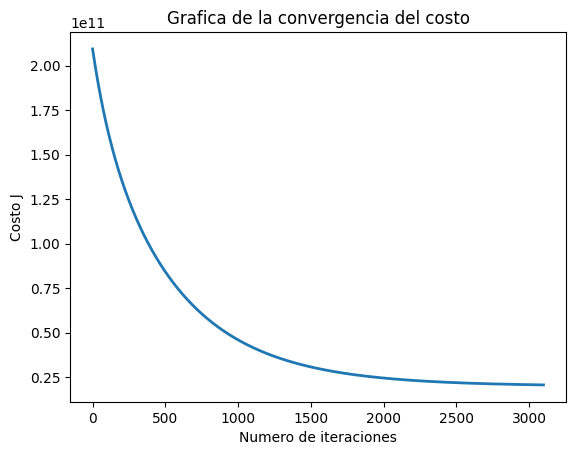

In [92]:
pyplot.plot(np.arange(len(J_historico_RLM)), J_historico_RLM, lw=2)
pyplot.title("Grafica de la convergencia del costo")
pyplot.xlabel('Numero de iteraciones')
pyplot.ylabel('Costo J')

##### 2.1.4.1 Grafica de la regresion lineal

En esta parte se trazan los datos de entrenamiento y una línea que representa la regresión lineal ajustada a esos datos.

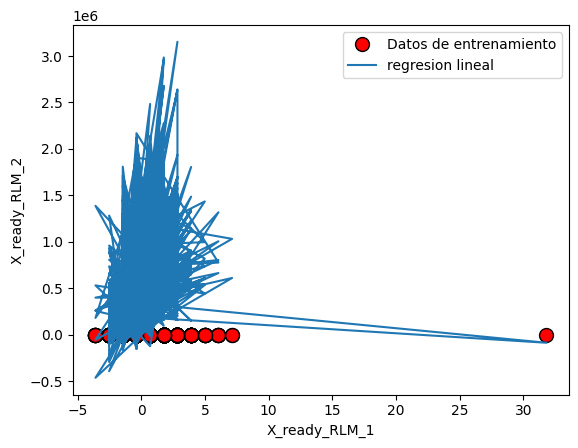

In [93]:
graficarDatos(X_ready_RLM[:, 1],  X_ready_RLM[:, 2] , "X_ready_RLM_1", "X_ready_RLM_2")

pyplot.plot(X_ready_RLM[:,1], np.dot(X_ready_RLM, theta_RLM), '-')

pyplot.legend(['Datos de entrenamiento', 'regresion lineal'])

haciendo una pequeña prueba:

In [94]:
X_arrayRLM = np.array([1,3,1,1180,5650,1,0,0,3,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650])
X_arrayRLM = X_arrayRLM.reshape(1, -1)

X_arrayRLM[:, 1:] = (X_arrayRLM[:, 1:] - mu_RLM) / sigma_RLM

prediccion_RLM = np.dot(X_arrayRLM, theta_RLM)

print (f"La prediccion de la casa es de: {prediccion_RLM}")

La prediccion de la casa es de: [189696.00534635]


#### 2.1.5 Ejemplos de Predicciones

Se creo una matriz con 11 ejemplos, donde se hace las predicciones correspondientes:

In [95]:
#Creamos la matriz con 11 ejemplos para hacer la prueba predecir un precio de cada ejemplo:
matriz_datos_RLM = np.array([
    [1,3,1,1180,5650,1,0,0,3,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650],
    [1,2,0.75,1020,1076,2,0,0,3,7,1020,0,2008,0,98144,47.5941,-122.299,1020,1357],
    [1,4,2.75,3555,6565,2,0,0,3,9,3555,0,2014,0,98053,47.6847,-122.017,3625,5637],
    [1,2,1,1040,13920,1,0,0,3,6,1040,0,1973,1867,98198,47.3756,-122.306,1100,7575],
    [1,4,1.75,1860,7350,1,0,0,4,7,1090,770,1977,1900,98031,47.3979,-122.174,1710,7350],
    [1,1,1,1060,54846,1,1,4,3,5,1060,0,1935,0,98070,47.4716,-122.445,2258,31762],
    [1,4,1.5,2220,9496,1,0,0,4,7,1490,730,1954,0,98004,47.6233,-122.206,1800,8286],
    [1,4,1.5,1560,6534,1,0,0,4,7,1560,0,1962,0,98007,47.6012,-122.152,1560,6969],
    [1,5,3,2510,4125,1.5,0,3,5,8,1590,920,1925,0,98144,47.5968,-122.29,2190,5415],
    [1,3,2.5,1680,2096,2,0,0,3,8,1380,300,2008,0,98117,47.6904,-122.37,1360,2096],
    [1,3,2.25,2020,3600,2,0,0,3,8,2020,0,1998,0,98033,47.6678,-122.165,2070,3699]
])

#creamos un vector parta almacenar cada Y predicha
y_pre_RLM = []
matriz_datos_RLM_copy = matriz_datos_RLM.copy()

#Normalizamos todos, menos el primer valor de cada ejemplo

matriz_datos_RLM_copy[:, 1:] = (matriz_datos_RLM_copy[:, 1:] - mu_RLM) / sigma_RLM


#Calculamos la Y predicha de los 11 ejemplos de prediccion
for datos in matriz_datos_RLM_copy:
    y_pre_RLM.append(np.dot(datos, theta_RLM))

matriz_datos_RLM = np.column_stack((matriz_datos_RLM, y_pre_RLM))

nombres_columnas = ['bedrooms','bathrooms','sqft_living','sqft_lot','floors','waterfront','view','condition','grade','sqft_above','sqft_basement','yr_built','yr_renovated','zipcode','lat','long','sqft_living15','sqft_lot15','Price']

# Convertir la matriz en una lista de listas
datos_para_tabla = matriz_datos_RLM.tolist()

print(len(matriz_datos_RLM[0]))
print(len(matriz_datos_RLM_copy[0]))

# Imprimir la tabla
print(tabulate(datos_para_tabla, headers=nombres_columnas, tablefmt='grid'))

20
19
+----+------------+-------------+---------------+------------+----------+--------------+--------+-------------+---------+--------------+-----------------+------------+----------------+-----------+---------+----------+-----------------+--------------+----------+
|    |   bedrooms |   bathrooms |   sqft_living |   sqft_lot |   floors |   waterfront |   view |   condition |   grade |   sqft_above |   sqft_basement |   yr_built |   yr_renovated |   zipcode |     lat |     long |   sqft_living15 |   sqft_lot15 |    Price |
+====+============+=============+===============+============+==========+==============+========+=============+=========+==============+=================+============+================+===========+=========+==========+=================+==============+==========+
|  1 |          3 |        1    |          1180 |       5650 |      1   |            0 |      0 |           3 |       7 |         1180 |               0 |       1955 |              0 |     98178 | 47.5112 | -

#### 2.1.6 Validaciones
Para hacer las validaciones correspondientes, primero se crea la funcion del **Mean squeared error**

Siguiendo el consejo de 80/20, donde 80% es para la fase de entrenamiento, y 20% es para la fase de prueba.

haciendo calculo del error cuadratico medio:

In [96]:
#Concatenamos de unos a la primera posicion del X_test
X_testRLM_ready = np.concatenate([np.ones((m_test_RLM, 1)), X_testRLM], axis=1)

# Normalizamos todos, menos el primer valor de cada ejemplo porque este contiene los unos
X_testRLM_ready[:, 1:] = (X_testRLM_ready[:, 1:] - mu_RLM) / sigma_RLM

#creamos un array que almacenara cada una de las y_predicha
y_predicha_RLM = []
for data_RLM in X_testRLM_ready:
    y_predicha_RLM.append(np.dot(data_RLM, theta_RLM))

mse_RLM = mean_squared_error(y_predicha_RLM, y_testRLM)
#calculamos el error cuadratico medio:
print('Error Cuadrático Medio (MSE) = ' + str(mse_RLM))
print('Raíz del Error Cuadrático Medio (RMSE) = ' + str(np.sqrt(mse_RLM)))

Error Cuadrático Medio (MSE) = 47647558790.402115
Raíz del Error Cuadrático Medio (RMSE) = 218283.2077609318


### 2.2 Regresion Polinomica

haciendo uso de **PolynomialFeatures**:

Carga de los datos para la regresion Polinomial:

In [97]:
#hacemos una copia de y_train y y_test para usarlo en la regresion lineal multivariable

#estos datos seran usados para el entrenamiento
X_testRLP = X_test.copy()
y_testRLP = y_test.copy()
m_test_RLP = len(y_testRLM)
#estos datos seran usados para el test

#hacemos uso de la libreria PolynomialFeatures para hacer la regresion polinomial de grado 2
poly = PolynomialFeatures(degree=2)
#hacemos una copia de y_train y y_test para usarlo en la regresion polinomial
X_trainRLP = poly.fit_transform(X_train.copy())
y_trainRLP = y_train.copy()
m_train_RLP = len(y_trainRLM)

print("la cantidad de columnas de X_trainRLP es de: ", X_trainRLP.shape[1])
print("la cantidad de ejemplos de X_trainRLP es de: ", X_trainRLP.shape[0])

la cantidad de columnas de X_trainRLP es de:  190
la cantidad de ejemplos de X_trainRLP es de:  17290


#### 2.2.1 Normalizacion de las caracteristicas

Se hace uso de la funcion de `featureNormalize(X) ` para normalizar cada una de las 190 feactures de mi nueva matriz de datos donde se recibe un parametro de tipo matriz para normalizar cada dato dentro de ella, retornandome la **matriz normalizda**, **sigma(desviacion estandar)**, y mi **mu(media)**.

In [98]:
#introductimos los datos a la funcion de normalizacion
X_norm_RLP, mu_RLP, sigma_RLP = featureNormalize(X_trainRLP)

X_norm_RLP.shape

(17290, 190)

#### 2.2.2 Agregamos la columna de unos a nuestra matriz

In [99]:
X_ready_RLP = np.concatenate([np.ones((m_train_RLP, 1)), X_norm_RLP], axis=1)
print("La cantidad de columnas de X_ready_RLP es de: ", X_ready_RLP.shape[1])

La cantidad de columnas de X_ready_RLP es de:  191


#### 2.2.3 Descenso por el gradiente

haciendo uso de la funcio de `calcularCosto(X , y, theta, lamda_)` donde `X` sera nuestra matriz normalizada, y sera nuestra `y_predicha` que en este caso sera el precio, `Thetha` que seran nuestros valores inciales, pero en este caso sin incluir el parametro de regularizacion.

##### 2.2.3.1 Cálculo del costo $J(\theta)$

In [100]:
#creamos un theta con 190 columnas de valores aleatorios
theta_RLP1=np.random.rand(len(X_ready_RLP[1]))
theta_RLP2=np.random.rand(len(X_ready_RLP[1]))


print(len(theta_RLP1))
lambda_RLP = 1000

print(f"########################################################################################################")
print(f"con theta:{ theta_RLP1 } se obtiene un costo de: {calcularCostoSR(X_ready_RLP, y_trainRLP, theta_RLP1)}")
print(f"########################################################################################################")
print(f"con theta:{ theta_RLP2 } se obtiene un costo de: {calcularCostoSR(X_ready_RLP, y_trainRLP, theta_RLP2)}")

191
########################################################################################################
con theta:[0.52351314 0.01448719 0.84921704 0.22297708 0.52305591 0.35420132
 0.20297633 0.54379427 0.3787868  0.73964877 0.00837508 0.51823553
 0.2164498  0.01605873 0.90966511 0.07802625 0.72480023 0.86841249
 0.03880482 0.20465699 0.82651419 0.01610884 0.18513148 0.49772694
 0.18090168 0.02123969 0.84603988 0.89552306 0.55750525 0.7168355
 0.95785432 0.26044807 0.26448734 0.1469907  0.44878582 0.12575968
 0.17179435 0.9399445  0.9257971  0.83697814 0.72453285 0.96717887
 0.84609011 0.15993714 0.35421052 0.66449423 0.59282216 0.21668346
 0.42062663 0.12727689 0.05053031 0.44495613 0.02784474 0.66927186
 0.68698524 0.07366883 0.48126934 0.55041781 0.74954419 0.66135487
 0.32841908 0.29744672 0.70982217 0.63342624 0.98157725 0.91551883
 0.37672676 0.71311784 0.25464467 0.81291875 0.24306483 0.2300564
 0.29937005 0.65537243 0.01524365 0.07539857 0.03786889 0.47661378
 0.65898867 

##### 2.2.3.2 Descenso por el gradiente

Creamos la funcion para hacer el calculo del descenso por el gradiente y asi encontrar nuestras **Thetas**
Haciendo uso de la funcion de `calcularDescensoGradiente(X,y, theta, alpha,num_iteraciones)`:

In [101]:
#creamos un theta con 19 columnas de ceros
theta_RLP = np.zeros(len(X_ready_RLP[0]))

#numero de iteraciones sera 1000000 y un alpha 0.0009
num_ite_RLP = 5000
alpha_RLP = 0.0009

theta_RLP, J_historico_RLP = calcularDescensoGradienteSR(X_ready_RLP, y_trainRLP, theta_RLP , alpha_RLP, num_ite_RLP)
print("########################################################################################################")
print("Los valores de theta calculados son:")
i = 0
for tht2 in theta_RLP:
    i += 1
    print(f"theta {i}: {tht2}")

print(f"########################################################################################################")
#mostramos el ultimo costo, este seria el mejor costo
print(f"con un costo de: { J_historico_RLP[-1]} ")

print("la cantidad de theta son: ", theta_RLP.shape[0])

########################################################################################################
Los valores de theta calculados son:
theta 1: 531806.0770503972
theta 2: 0.0
theta 3: -5027.547654926053
theta 4: -3405.583454332372
theta 5: -4340.000567059962
theta 6: 2560.597990457745
theta 7: -135.5873300674213
theta 8: -1534.3834064607408
theta 9: -2643.153146097622
theta 10: -978.6053047329448
theta 11: 11706.566492131156
theta 12: -2444.512891977379
theta 13: -4397.26101907355
theta 14: -13861.064475767756
theta 15: -3584.1656550969365
theta 16: -15487.982233005612
theta 17: 22752.350939377066
theta 18: -7916.315620747603
theta 19: -39.50904618574523
theta 20: 2391.2750734227648
theta 21: 5927.747187432195
theta 22: -401.48583997824176
theta 23: 1600.4974361417515
theta 24: -3084.296285224395
theta 25: -999.1001485370211
theta 26: 5396.732832365082
theta 27: -845.1002724275138
theta 28: 1444.6779624870035
theta 29: 8605.357580226633
theta 30: 4723.056099636129
theta 31: -636

#### 2.2.4 Grafica de la convergencia del costo
Graficamos el costo

Text(0, 0.5, 'Costo J')

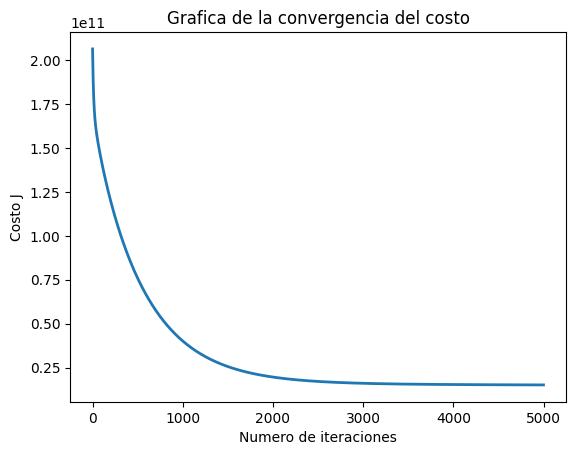

In [102]:
pyplot.plot(np.arange(len(J_historico_RLP)), J_historico_RLP, lw=2)
pyplot.title("Grafica de la convergencia del costo")
pyplot.xlabel('Numero de iteraciones')
pyplot.ylabel('Costo J')

##### 2.2.4.1 Grafica de la regresion Polinomial

En esta parte se trazan los datos de entrenamiento y una línea que representa la regresión lineal ajustada a esos datos.

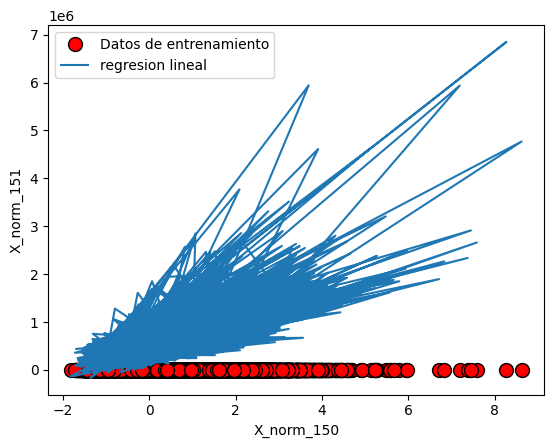

In [103]:
graficarDatos(X_norm_RLP[:, 150], X_norm_RLP[:, 151] , "X_norm_150", "X_norm_151")

pyplot.plot(X_norm_RLP[:,150], np.dot(X_ready_RLP, theta_RLP), '-')

pyplot.legend(['Datos de entrenamiento', 'regresion lineal'])

haciendo una pequeña prueba:

In [104]:
X_arrayRLP = np.array([3,1,1180,5650,1,0,0,3,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650])
X_arrayRLP = X_arrayRLP.reshape(1, -1)

poly = PolynomialFeatures(degree=2)
#hacemos una copia de y_train y y_test para usarlo en la regresion polinomial
X_arrayRLP = poly.fit_transform(X_arrayRLP)

X_arrayRLP = np.concatenate([np.ones((X_arrayRLP.shape[0], 1)), X_arrayRLP], axis=1)

X_arrayRLP[:, 1:] = (X_arrayRLP[:, 1:] - mu_RLP) / sigma_RLP

prediccion_RLP = np.dot(X_arrayRLP, theta_RLP)

print (f"La prediccion de la casa es de: {prediccion_RLP}")

La prediccion de la casa es de: [253211.63162483]


#### 2.2.5 Ejemplos de Predicciones

Se creo una matriz con 11 ejemplos, donde se hace las predicciones correspondientes:

In [105]:
#Creamos la matriz con 11 ejemplos para hacer la prueba predecir un precio de cada ejemplo:
matriz_datos_RLP = np.array([
    [3,1,1180,5650,1,0,0,3,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650],
    [2,0.75,1020,1076,2,0,0,3,7,1020,0,2008,0,98144,47.5941,-122.299,1020,1357],
    [4,2.75,3555,6565,2,0,0,3,9,3555,0,2014,0,98053,47.6847,-122.017,3625,5637],
    [2,1,1040,13920,1,0,0,3,6,1040,0,1973,1867,98198,47.3756,-122.306,1100,7575],
    [4,1.75,1860,7350,1,0,0,4,7,1090,770,1977,1900,98031,47.3979,-122.174,1710,7350],
    [1,1,1060,54846,1,1,4,3,5,1060,0,1935,0,98070,47.4716,-122.445,2258,31762],
    [4,1.5,2220,9496,1,0,0,4,7,1490,730,1954,0,98004,47.6233,-122.206,1800,8286],
    [4,1.5,1560,6534,1,0,0,4,7,1560,0,1962,0,98007,47.6012,-122.152,1560,6969],
    [5,3,2510,4125,1.5,0,3,5,8,1590,920,1925,0,98144,47.5968,-122.29,2190,5415],
    [3,2.5,1680,2096,2,0,0,3,8,1380,300,2008,0,98117,47.6904,-122.37,1360,2096],
    [3,2.25,2020,3600,2,0,0,3,8,2020,0,1998,0,98033,47.6678,-122.165,2070,3699]
])

#creamos un vector parta almacenar cada Y predicha
y_pre_RLP = []

matriz_datos_RLP_copy = matriz_datos_RLP.copy()

poly = PolynomialFeatures(degree=2)
#hacemos una copia de y_train y y_test para usarlo en la regresion polinomial
matriz_datos_RLP = poly.fit_transform(matriz_datos_RLP)

matriz_datos_RLP = np.concatenate([np.ones((matriz_datos_RLP.shape[0], 1)), matriz_datos_RLP], axis=1)


#Normalizamos todos, menos el primer valor de cada ejemplo

matriz_datos_RLP[:, 1:] = (matriz_datos_RLP[:, 1:] - mu_RLP) / sigma_RLP


#Calculamos la Y predicha de los 11 ejemplos de prediccion
for datos in matriz_datos_RLP:
    y_pre_RLP.append(np.dot(datos, theta_RLP.T))

matriz_datos_RLP_copy = np.column_stack((matriz_datos_RLP_copy, y_pre_RLP))

nombres_columnas = ['bedrooms','bathrooms','sqft_living','sqft_lot','floors','waterfront','view','condition','grade','sqft_above','sqft_basement','yr_built','yr_renovated','zipcode','lat','long','sqft_living15','sqft_lot15','Price']

# Convertir la matriz en una lista de listas
datos_para_tabla = matriz_datos_RLP_copy.tolist()

print(len(matriz_datos_RLM[0]))
print(len(matriz_datos_RLM_copy[0]))

# Imprimir la tabla
print(tabulate(datos_para_tabla, headers=nombres_columnas, tablefmt='grid'))

20
19
+------------+-------------+---------------+------------+----------+--------------+--------+-------------+---------+--------------+-----------------+------------+----------------+-----------+---------+----------+-----------------+--------------+----------+
|   bedrooms |   bathrooms |   sqft_living |   sqft_lot |   floors |   waterfront |   view |   condition |   grade |   sqft_above |   sqft_basement |   yr_built |   yr_renovated |   zipcode |     lat |     long |   sqft_living15 |   sqft_lot15 |    Price |
+============+=============+===============+============+==========+==============+========+=============+=========+==============+=================+============+================+===========+=========+==========+=================+==============+==========+
|          3 |        1    |          1180 |       5650 |      1   |            0 |      0 |           3 |       7 |         1180 |               0 |       1955 |              0 |     98178 | 47.5112 | -122.257 |           

### 2.3 Ecuacion de la normal

Utilizada en el contexto de la regresión lineal para calcular los parámetros del modelo de regresión directamente a partir de los datos de entrenamiento. Se denomina "normal" porque se deriva de la "ecuación normal" de un sistema de ecuaciones lineales.

#### 2.3.1 Agregando la columna de unos a la matriz $X$ para tener el termino de intersección

In [106]:
# Cargamos los datos utilizando pandasd
data = pd.read_csv('kc_house_data.csv', delimiter=',')

#retiramos el id y la fecha del las columnas, quitamos el precio ya que ira a el vector Y, tambien quitamos los titulos
dataset = data.drop(['id', 'date'], axis=1).astype(float)

# Seleccionar aleatoriamente 20,000 ejemplos
sampled_dataset = dataset.sample(n=20000, random_state=42)

train_dataset, test_dataset = train_test_split(sampled_dataset, test_size=0.2, random_state=42)

X_testEc = test_dataset.drop(['price'], axis=1).values
y_testEc = test_dataset['price'].values
m_testEc = len(y_testEc)

# Seleccionamos las columnas para X y la columna 'price' para Y
X_trainEc = train_dataset.drop(['price'], axis=1).values
y_trainEc = train_dataset['price'].values
m_trainEc = len(y_trainEc)

#añadimos unos a la X
X_ren = np.concatenate([np.ones((m_trainEc, 1)), X_trainEc], axis=1)

#Imprimimos X_ready
print('{:>8s}{:>10s}{:>10s}{:>10s}{:>8s}{:>8s}{:>8s}{:>8s}{:>6s}{:>10s}{:>10s}{:>10s}{:>10s}{:>10s}{:>10s}{:>10s}{:>10s}{:>10s}{:>10s}'.format(
    'X_ren[:,0]', '  X_ren[:, 1]', '  X_ren[:, 2]', '  X_ren[:, 3]', '  X_ren[:, 4]', '  X_ren[:, 5]', '  X_ren[:, 6]', '  X_ren[:, 7]', '  X_ren[:, 8]', '  X_ren[:, 9]', '  X_ren[:, 10]', '  X_ren[:, 11]',
    '  X_ren[:, 12]', '  X_ren[:, 13]', '  X_ren[:, 14]', '  X_ren[:, 15]', '  X_ren[:, 16]', '  X_ren[:, 17]', '  X_ren[:, 18]'
))
print('-' * 260)

for i in range(10):
    print('{:10.0f}{:12.0f}{:12.0f}{:15.0f}{:14.0f}{:12.0f}{:13.0f}{:14.0f}{:12.0f}{:14.0f}{:13.0f}{:14.0f}{:13.0f}{:14.0f}{:15.0f}{:13.0f}{:14.0f}{:15.0f}{:14.0f}'.format(
        X_ren[i, 0], X_ren[i, 1], X_ren[i, 2], X_ren[i, 3], X_ren[i, 4], X_ren[i, 5], X_ren[i, 6], X_ren[i, 7], X_ren[i, 8], X_ren[i, 9], X_ren[i, 10], X_ren[i, 11],
        X_ren[i, 12], X_ren[i, 13], X_ren[i, 14], X_ren[i, 15], X_ren[i, 16], X_ren[i, 17], X_ren[i, 18]
    ))

X_ren[:,0]  X_ren[:, 1]  X_ren[:, 2]  X_ren[:, 3]  X_ren[:, 4]  X_ren[:, 5]  X_ren[:, 6]  X_ren[:, 7]  X_ren[:, 8]  X_ren[:, 9]  X_ren[:, 10]  X_ren[:, 11]  X_ren[:, 12]  X_ren[:, 13]  X_ren[:, 14]  X_ren[:, 15]  X_ren[:, 16]  X_ren[:, 17]  X_ren[:, 18]
--------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
         1           2           2           1390          6670           1            0             0           3             6          720           670         1941             0          98115           48          -122            920          6380
         1           3           3           2540          8604           2            0             0           3             8         2540             0         1991             0          98092           47          -122       

#### 2.3.2 Calculando Theta

In [107]:
# Calculamos thea haciendo uso de la funcion
lambda_Ec = 1000
theta_Ec = calcularThethaEcuacionNormalSR(X_ren, y_trainEc);

print(f"########################################################################################################")
print("Los valores de theta usando la ecuacion de la normal es calculados son:")
i = 0
for thtEc in theta_Ec:
    i += 1
    print(f"theta {i}: {thtEc}")
print(f"########################################################################################################")

########################################################################################################
Los valores de theta usando la ecuacion de la normal es calculados son:
theta 1: 15550765.562788932
theta 2: -3336164.915750435
theta 3: -384208.4392969166
theta 4: 38293.39210539675
theta 5: 0.2649409555920973
theta 6: 269602.53481336473
theta 7: 1540664.1240256045
theta 8: -25775.18209456873
theta 9: 14609.543056991997
theta 10: 149134.68604321865
theta 11: -37727.46992693181
theta 12: -37623.77740831107
theta 13: -2556.2520189300158
theta 14: 18.57716656465609
theta 15: -567.0177064511505
theta 16: 610567.276181861
theta 17: -215629.0738984424
theta 18: 27.76142619483184
theta 19: -0.3921443226667025
########################################################################################################


Haciendo pequeña prueba

In [108]:
X_arrayEc = np.array([1,3,1,1180,5650,1,0,0,3,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650])

prediccion_Ec = np.dot(X_arrayEc, theta_Ec.T)

print (f"La prediccion de la casa es de: {prediccion_Ec}")

La prediccion de la casa es de: 1924516.7039576033


#### 2.3.3 Ejemplos de Predicciones haciendo uso de la Ecuacion de la normal
Se creo una matriz con 11 ejemplos, donde se hace las predicciones correpondientes:

In [109]:
matriz_datosEc = np.array([
    [1,3,1,1180,5650,1,0,0,3,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650],
    [1,2,0.75,1020,1076,2,0,0,3,7,1020,0,2008,0,98144,47.5941,-122.299,1020,1357],
    [1,4,2.75,3555,6565,2,0,0,3,9,3555,0,2014,0,98053,47.6847,-122.017,3625,5637],
    [1,2,1,1040,13920,1,0,0,3,6,1040,0,1973,2020,98198,47.3756,-122.306,1100,7575],
    [1,4,1.75,1860,7350,1,0,0,4,7,1090,770,1977,2000,98031,47.3979,-122.174,1710,7350],
    [1,1,1,1060,54846,1,1,4,3,5,1060,0,1935,0,98070,47.4716,-122.445,2258,31762],
    [1,4,1.5,2220,9496,1,0,0,4,7,1490,730,1954,0,98004,47.6233,-122.206,1800,8286],
    [1,4,1.5,1560,6534,1,0,0,4,7,1560,0,1962,0,98007,47.6012,-122.152,1560,6969],
    [1,5,3,2510,4125,1.5,0,3,5,8,1590,920,1925,0,98144,47.5968,-122.29,2190,5415],
    [1,3,2.5,1680,2096,2,0,0,3,8,1380,300,2008,0,98117,47.6904,-122.37,1360,2096],
    [1,3,2.25,2020,3600,2,0,0,3,8,2020,0,1998,0,98033,47.6678,-122.165,2070,3699]
])

#creamos un vector parta almacenar cada Y predicha
y_pre_Ec = []
#Calculamos la Y predicha de los 11 ejemplos de prediccion
for datosEc in matriz_datosEc:
    y_pre_Ec.append(np.dot(datosEc, theta_Ec))

matriz_datosEc = np.column_stack((matriz_datosEc, y_pre_Ec))

nombres_columnas = ['bedrooms','bathrooms','sqft_living','sqft_lot','floors','waterfront','view','condition','grade','sqft_above','sqft_basement','yr_built','yr_renovated','zipcode','lat','long','sqft_living15','sqft_lot15','Price']

# Convertir la matriz en una lista de listas
datos_para_tabla = matriz_datosEc.tolist()

# Imprimir la tabla
print(tabulate(datos_para_tabla, headers=nombres_columnas, tablefmt='grid'))

+----+------------+-------------+---------------+------------+----------+--------------+--------+-------------+---------+--------------+-----------------+------------+----------------+-----------+---------+----------+-----------------+--------------+-------------------+
|    |   bedrooms |   bathrooms |   sqft_living |   sqft_lot |   floors |   waterfront |   view |   condition |   grade |   sqft_above |   sqft_basement |   yr_built |   yr_renovated |   zipcode |     lat |     long |   sqft_living15 |   sqft_lot15 |             Price |
+====+============+=============+===============+============+==========+==============+========+=============+=========+==============+=================+============+================+===========+=========+==========+=================+==============+===================+
|  1 |          3 |        1    |          1180 |       5650 |      1   |            0 |      0 |           3 |       7 |         1180 |               0 |       1955 |              0 |   

#### 2.3.4 Validaciones
Para hacer las validaciones correspondientes, primero se crea la funcion del **Mean squeared error**

Siguiendo el consejo de 80/20, donde 80% es para la fase de entrenamiento, y 20% es para la fase de prueba.

In [110]:
#Concatenamos de unos a la primera posicion del X_test para la ecuacion normal
X_ready_testEc = np.concatenate([np.ones((m_testEc, 1)), X_testEc], axis=1)

#creamos un array que almacenara cada una de las y_predicha  para la ecuacion normal
y_predicha_Ec = []
for data_test_ready in X_ready_testEc:
    y_predicha_Ec.append(np.dot(data_test_ready, theta_Ec))

#calculamos el error cuadratico medio y la raiz del error cuadratico medio:
mse_Ec = mean_squared_error(y_predicha_Ec, y_testEc)
#calculamos el error cuadratico medio:
print('Error Cuadrático Medio (MSE) = ' + str(mse_Ec))
print('Raíz del Error Cuadrático Medio (RMSE) = ' + str(np.sqrt(mse_Ec)))

Error Cuadrático Medio (MSE) = 8652638787130.842
Raíz del Error Cuadrático Medio (RMSE) = 2941536.8070331607
